### Import

In [1]:
from MFEA_lib.model import SMP_MFEA, MFEA_base, SA_MFEA, AbstractModel
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *
from MFEA_lib.tasks.Benchmark.Competitions import CEC17_benchmark, GECCO20_benchmark_50tasks, WCCI22_benchmark

import os 
import sys 
import numpy as np 
import pandas as pd
import scipy 

import matplotlib.pyplot as plt 


In [15]:
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT\S-MFEA_CEC17_PYTHON.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT\S-MFEA_CEC17_PYTHON.mso


In [9]:
model.ls_model[21] = model.ls_model[0] 

In [10]:
model.ls_model[3] = model.ls_model[0] 

In [11]:
model.set_attribute()

In [14]:
saveModel(model, PATH="C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT\S-MFEA_CEC17_PYTHON.mso", remove_tasks= True)

'Saved'

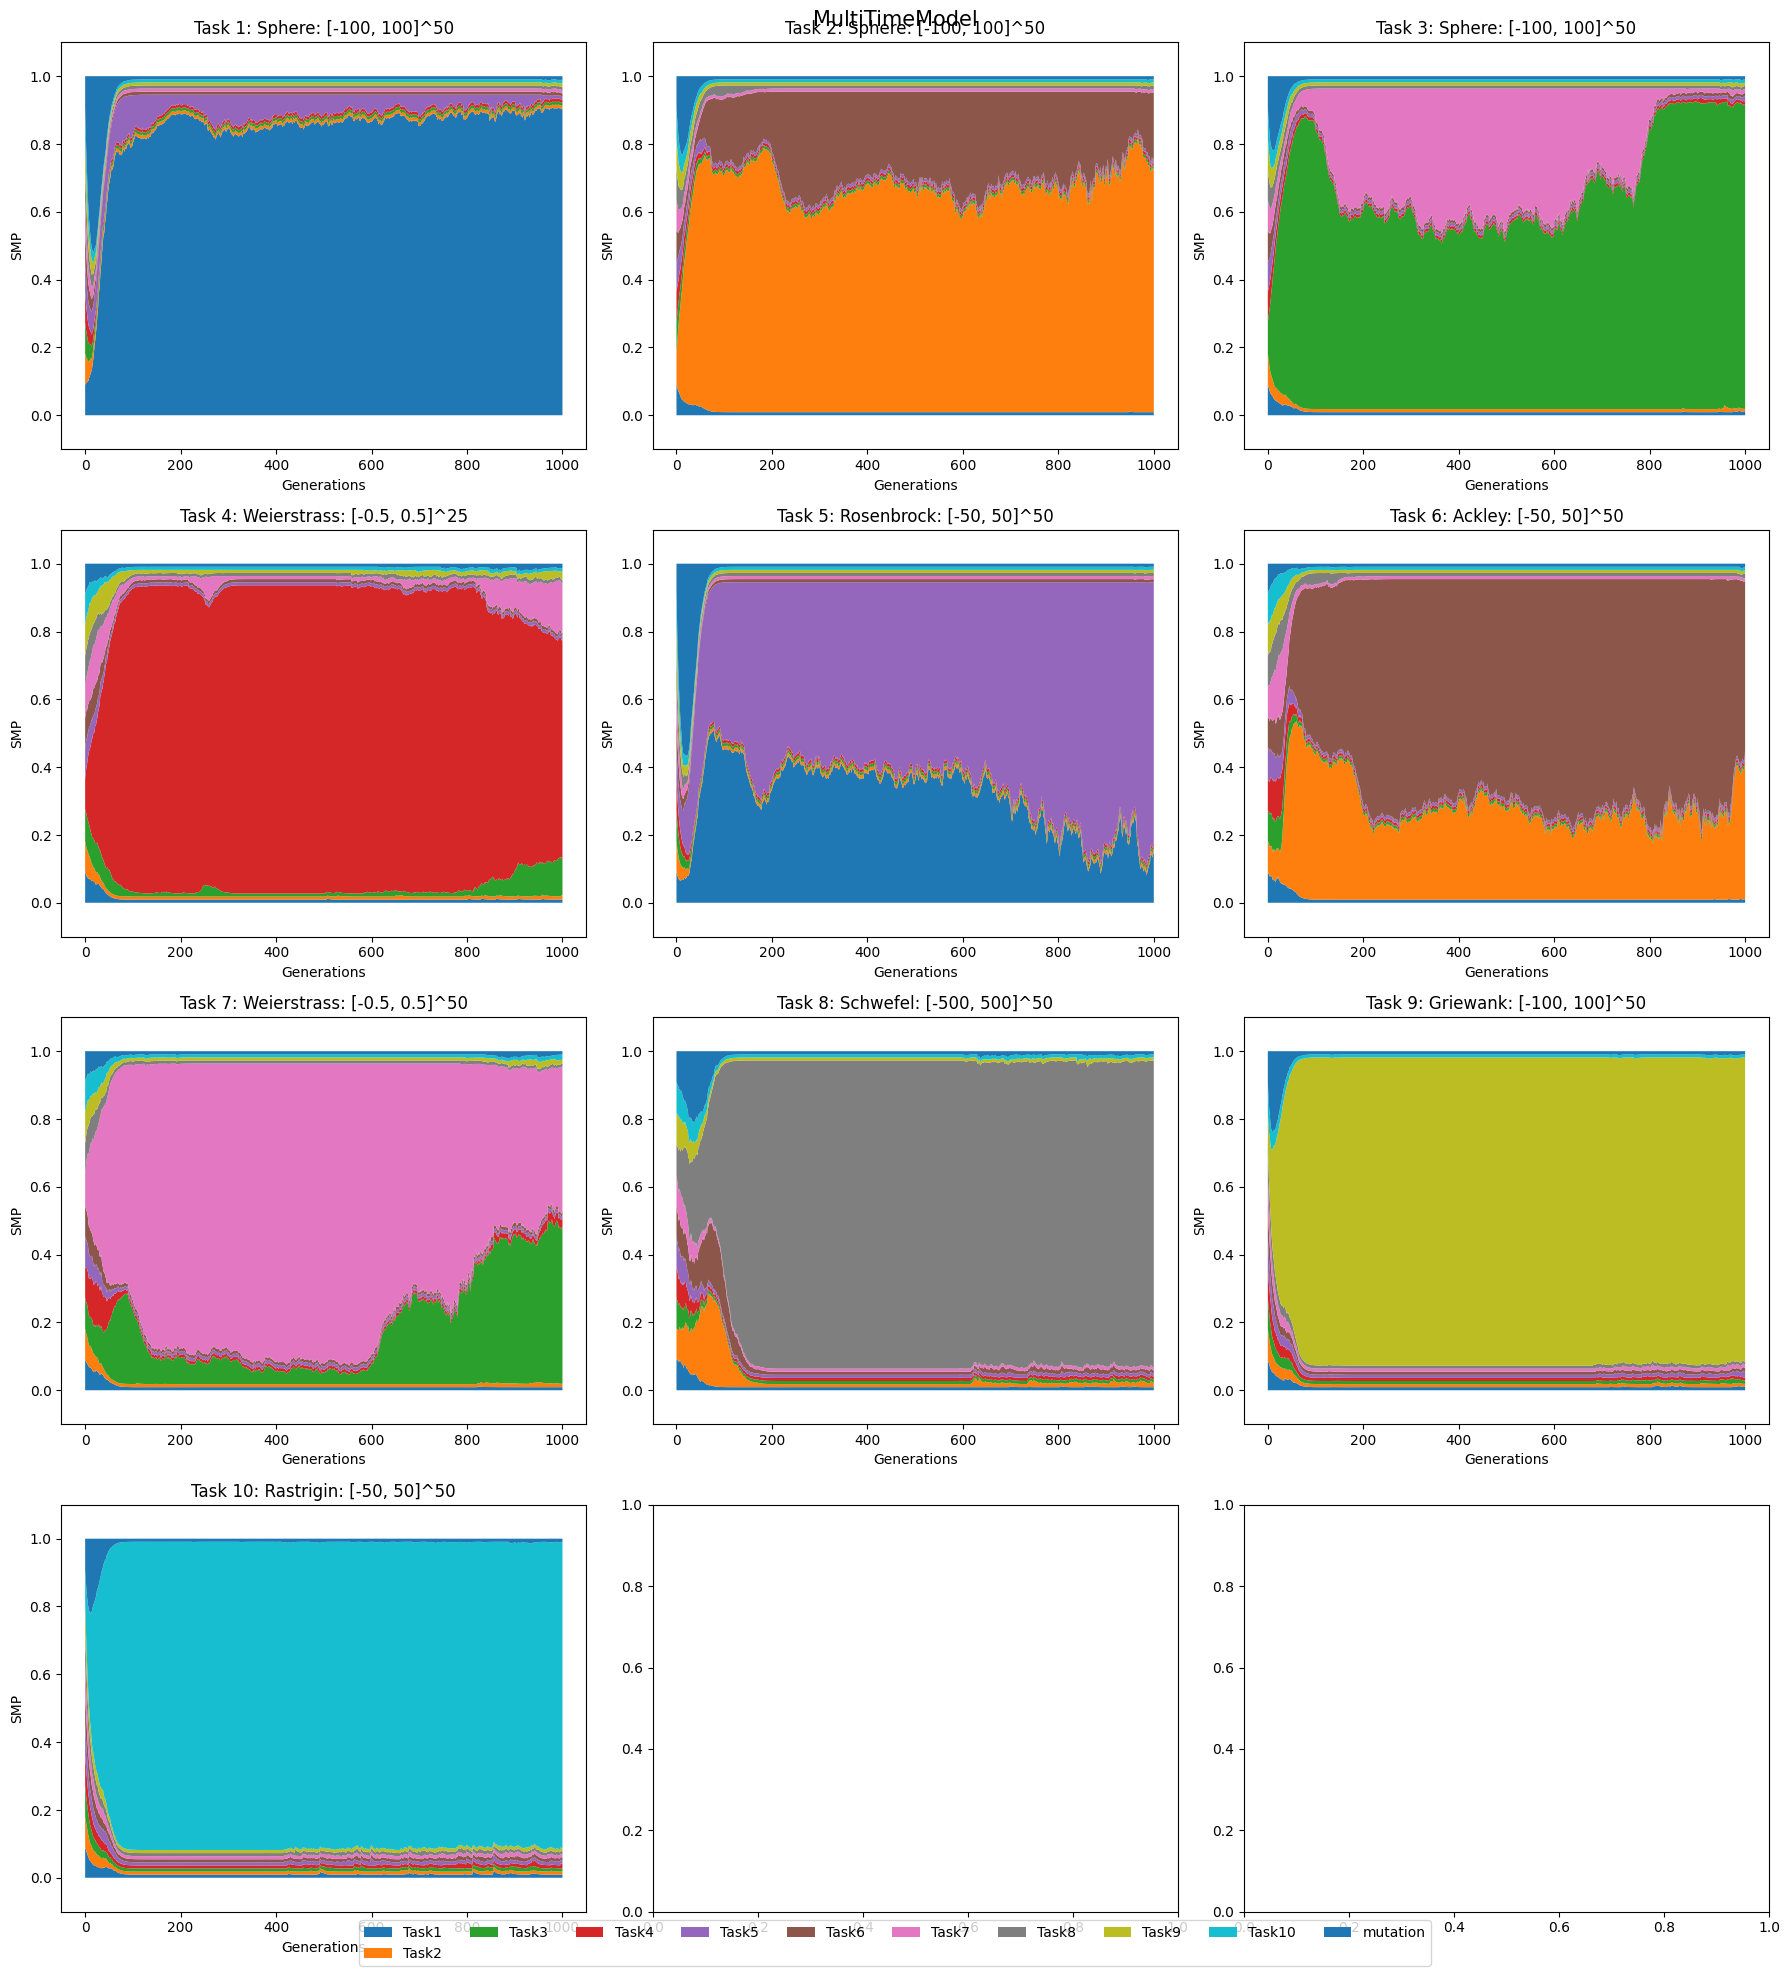

In [24]:
model.render_smp()

In [ ]:
model = loadModel("C:/Users/Admin/Downloads/virtual/GECCO/KL/SMP_LINEAR_pm_1/1.mso", ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(1)[0])

### Convert

#### Convert .mat -> mso

In [23]:
import scipy.io 
file_mat = scipy.io.loadmat('Data_MTEA-AD\MTEA_AD_50_1_datasum.mat')

In [11]:
dir_CEC_save_npy = "MTEA_AD_CEC17"
dir_GECCO_save_npy = "MTEA_AD_GECCO"

if os.path.isdir(dir_CEC_save_npy) is False: 
    os.makedirs(dir_CEC_save_npy)
if os.path.isdir(dir_GECCO_save_npy) is False:
    os.makedirs(dir_GECCO_save_npy)



In [18]:
BestFitness = file_mat.get('data')['BestFitness'][0][0] 
BestFitness.shape
time = file_mat.get('data')['wall_clock_time'][0][0] 
total_time = np.sum(time, axis=0) 

In [3]:
avg = file_mat.get('data')['EvBestFitness_evn'][0][0]

In [8]:
avg = file_mat.get('data')['EvBestFitness_evn'][0][0]
history_cost = np.zeros(shape=(1001, 10), dtype= "float")
for i in range(0, 1001):
    history_cost[i] = avg[i // 100]
all_his = np.zeros(shape=(30, 1001, 10), dtype='float') 
for i in range(30): 
    all_his[i] = history_cost

In [9]:
print(history_cost[-1])

[1.06093017e-07 2.99055267e-09 5.84163882e-12 5.63105118e-13
 1.16871453e-05 1.49350247e-05 5.11031294e-04 6.36708541e-04
 4.93075879e-04 1.76267492e+01]


In [13]:
all_his = np.zeros(shape=(30, 1001, 10), dtype='float') 
for i in range(30): 
    all_his[i] = history_cost

In [16]:
np.save(os.path.join(dir_CEC_save_npy, "MTEA_AD_CEC17_matlab"), all_his)

In [10]:
print(avg[-1])

[1.06093017e-07 2.99055267e-09 5.84163882e-12 5.63105118e-13
 1.16871453e-05 1.49350247e-05 5.11031294e-04 6.36708541e-04
 4.93075879e-04 1.76267492e+01]


In [25]:
file_mat = scipy.io.loadmat(f'Data_MTEA-AD\MTEA_AD_50_{1}_datasum.mat')

In [37]:
for i in range(1, 11): 
    file_mat = scipy.io.loadmat(f'Data_MTEA-AD\MTEA_AD_50_{i}_datasum.mat')
    avg = file_mat.get('data')['EvBestFitness_evn'][0][0]
    # print(avg.shape)
    # break
    history_cost = np.zeros(shape=(1001, 50), dtype= "float")
    for j in range(0, 1001):
        history_cost[j] = avg[i // 100]
    all_his = np.zeros(shape=(30, 1001, 50), dtype='float') 
    for k in range(30): 
        all_his[k] = history_cost
    ls_total_time.append(np.sum(file_mat.get('data')['wall_clock_time'][0][0], axis=0)[0])
    np.save(os.path.join(dir_GECCO_save_npy, f"MTEA_AD_GECCO_matlab_{i}"), all_his)

In [20]:
print(total_time[0])

1004.5383366


In [31]:
print(ls_total_time.)

AttributeError: 'list' object has no attribute 'shape'

In [5]:
np.save(os.path.join(dir_CEC_save_npy, "MTEA_AD_CEC17_matlab"), BestFitness)

#### Convert txt to mso

In [3]:
def save_Only_history_folder(path= "./", source= "./", ls_tasks = WCCI22_benchmark.get_50tasks_benchmark(1)[0]):
    for filename in os.listdir(source): 
        model  = loadModel(os.path.join(source, filename), ls_tasks= ls_tasks)
        model.history_smp = None 
        for model_com in model.ls_model: 
            model_com.history_smp = None 
        if os.path.isdir(path) is False: 
            os.makedirs(path)
        saveModel(model, os.path.join(path, filename), remove_tasks= True)
    pass 



In [2]:
def loadFileAndSave(source_path, target_path, model, remove_tasks: bool = False, history_cost_shape= (1000, 2), nb_runs = 1, ls_tasks = [], name_model = None, total_time= None ):
    '''
    File txt has the format of MTO competition.

    Load result from file txt and save it to .mso file
    
    Args: 
        remove_tasks: Do remove tasks when save model or not ? 
        history_cost_shape: The history cost shape in one run. 
        nb_runs: the number run of model 
        ls_tasks: list of tasks
        name_model (optional): that will be use as name to save the model 
    
    Results: 
        Save .mso file 
    '''
    data = pd.read_csv(source_path, header= None) 
    # data = pd.read_csv(source_path, header= None, delim_whitespace= True).astype("float") 

    if history_cost_shape[0] != len(data):
        # history_cost_shape[0] = len(data)
        history_cost_shape = (len(data), history_cost_shape[1])
        # print(f"history_cost_shape: {history_cost_shape[0]}, length_data: {len(data)}")
    
    if(history_cost_shape[1] * nb_runs != len(data[0])): 
        nb_runs = (data.shape[1] - 1) / history_cost_shape[1] 
        nb_runs = int(nb_runs)
    history_cost = np.zeros(shape = (nb_runs,history_cost_shape[0], history_cost_shape[1]))
    
    data_transpose = data.transpose() 
    count_row = 1
    for i_run in range(nb_runs): 
        for idx_task in range(len(ls_tasks)):
            history_cost[i_run, :,idx_task] = data_transpose.iloc[count_row, :]
            count_row += 1  
    
    avg_history_cost = np.average(history_cost, axis = 0) 
    assert avg_history_cost.shape == history_cost_shape 


    mutiltime_model = MultiTimeModel(model) 
    mutiltime_model.compile()
    mutiltime_model.tasks = None 
    mutiltime_model.history_cost = avg_history_cost
    mutiltime_model.nb_run = nb_runs 

    for run in range(nb_runs): 
        new_model = model.model() 
        new_model.history_cost = history_cost[run] 
        mutiltime_model.ls_model.append(new_model)
    if name_model is None:
        name_model = source_path.split("/")[-1].split(".")[0]
    
    if os.path.isdir(target_path) is False: 
        os.makedirs(target_path) 
    
    return saveModel(model= mutiltime_model, PATH= f"{target_path}/{name_model}.mso", remove_tasks= remove_tasks, total_time= total_time) 

    

In [11]:
for index in range(1, 11):
    path = f"C:/Users/Admin/Downloads/EME-BI_TEVC22-master/EME-BI_TEVC22-master/results/gecco20/benchmark{index}.txt"
    file = open(path, 'r')
    full_data = file.readlines() 
    target_path = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO//ALL_RESULT/Ensemble/"
    name_model = f"{index}" 
    loadFileAndSave(
        source_path=path,
        target_path= target_path, 
        model= AbstractModel,
        remove_tasks= True, 
        history_cost_shape= (1000,50),
        nb_runs= 30,
        ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0],
        name_model= name_model, 
        total_time= 0,
)

In [3]:

path = f"C:/Users/Admin/Downloads/EME-BI_TEVC22-master/EME-BI_TEVC22-master/results/cec17/Result_EME_BI.txt"
file = open(path, 'r')
full_data = file.readlines() 
target_path = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO//ALL_RESULT/Ensemble/"
name_model = "Ensemble" 
loadFileAndSave(
    source_path=path,
    target_path= target_path, 
    model= AbstractModel,
    remove_tasks= True, 
    history_cost_shape= (1000,10),
    nb_runs= 30,
    ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0],
    name_model= name_model, 
    total_time= 0,
)

'Saved'

In [10]:
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO//ALL_RESULT/Ensemble/1.mso", ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0])
print(model.history_cost[-1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [25]:
# path = 
file = open("C:/Users/Admin/Downloads/RESULT/LSA_MaTGA_EBS_SBS_CEC17/SBS_GA_Results_benchmark_10/Benchmark_1/Result_SBS_GA.txt", 'r') 
full_data = file.readlines()
data = full_data[:-1]

# print(data[0])
time = float(full_data[-1].strip("\n").split(" ")[-1]) / 1e9 
tmp = open("tmp.txt", 'w')
tmp.writelines(data) 
target_path = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT/"
name_model = "SBS_GA_CEC17_JAVA"
loadFileAndSave(source_path= "tmp.txt",
                target_path=target_path, 
                model= AbstractModel, 
                remove_tasks= True,
                history_cost_shape= (1000, 10), 
                nb_runs= 30, 
                ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0],
                name_model=name_model, 
                total_time= time
                )


'Saved'

In [26]:
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT/SBS_GA_CEC17_JAVA.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT/SBS_GA_CEC17_JAVA.mso


In [27]:
model.history_cost[-1]

array([2.44739948e-03, 1.26507418e-03, 5.39496185e-06, 2.17932157e-04,
       2.31851316e-01, 9.33697779e-03, 8.36819811e-03, 4.34756222e+01,
       7.39135312e-03, 5.03344744e+00])

In [28]:
model.ls_model[0].history_cost[-1]

array([4.37732779e-03, 1.56844594e-03, 5.97487840e-06, 4.98872053e-10,
       3.06281183e-01, 1.16189965e-02, 6.90167497e-03, 3.13679999e-02,
       1.48680883e-02, 2.43963782e+00])

In [29]:
print(model.total_time)

1641.0259455


In [1]:
ls_name = ['EBS_GA', "SBS_GA", "MaTGA", "MFEA", "LMFEA_3"]
# ls_name = ["MFEA"]
ls_time_avg = []

In [31]:
a = 200512518900 / 1e9 

In [32]:
print(a)

200.5125189


In [52]:
print(ls_time_avg)

[7068681640160.0, 7061984862630.0, 7068.681640159999, 7061.984862629999, 29667.589585769998, 7068.681640159999, 7061.984862629999, 29667.589585769998]


In [55]:
ls_name = ['EBS_GA', "SBS_GA", "MaTGA", "LMFEA_3", "MFEA"]
# ls_name = ["MFEA"]
ls_time_avg = []
for name_algo in ls_name:
    prev = 0 
    sum = 0 
    for benchmark_id in range(1, 11): 
        file = open(f"C:/Users/Admin/Downloads/RESULT/EBS_SBS_MaTGA/{name_algo}_Results_benchmark_50/Benchmark_{benchmark_id}/Result_{name_algo}.txt", 'r') 
        a = file.readlines()[-1].strip("\n").split(" ")[-1]
        file.close()
        a = float(a)
        # print(a - prev)
        sum += a 
        prev =a 
        # break
    ls_time_avg.append(sum/ 10)


In [12]:
109.88821983 / 115.23335684000001

0.953614672378054

In [56]:
print(ls_time_avg)

[176.32659109000002, 178.24008734, 840.74169802, 109.88821983, 115.23335684000001]


C:\Users\Admin\AppData\Local\Temp\ipykernel_17012\327054473.py:9: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize= 10)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17012\327054473.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize= 10)


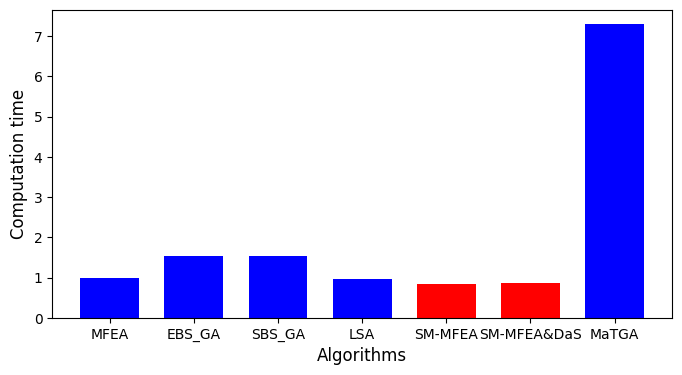

In [13]:
courses = [1, 1.5301697, 1.5467751,0.953614672378054,0.84509049, 0.86043965, 7.29599242, ] 
values = ["MFEA", "EBS_GA", "SBS_GA","LSA","SM-MFEA", "SM-MFEA&DaS", "MaTGA", ]  
fig = plt.figure(figsize = (8, 4))
 
# creating the bar plot
plt.bar(values, courses, color=['blue', 'blue','blue', 'blue', 'red', 'red', 'blue'],
        width = 0.7)
for tick in fig.axes[0].xaxis.get_major_ticks(): 
    tick.label.set_fontsize(fontsize= 10)
for tick in fig.axes[0].yaxis.get_major_ticks(): 
    tick.label.set_fontsize(fontsize= 10)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Computation time", fontsize=12)
# plt.title("Computation time")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17012\649822291.py:9: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize= 10)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17012\649822291.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize= 10)


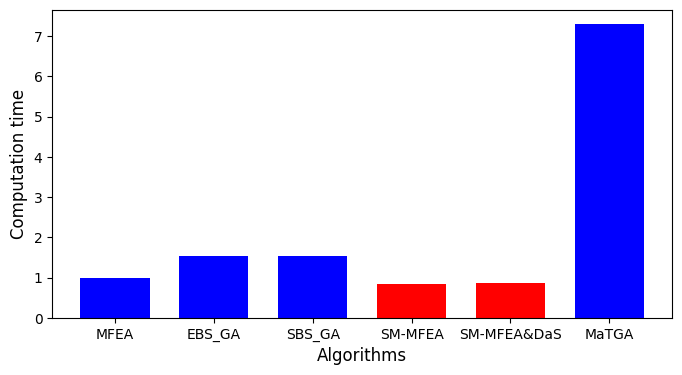

In [7]:
courses = [1, 1.5301697, 1.5467751,0.84509049, 0.86043965, 7.29599242, ] 
values = ["MFEA", "EBS_GA", "SBS_GA","SM-MFEA", "SM-MFEA&DaS", "MaTGA", ]  
fig = plt.figure(figsize = (8, 4))
 
# creating the bar plot
plt.bar(values, courses, color=['blue', 'blue', 'blue', 'red', 'red', 'blue'],
        width = 0.7)
for tick in fig.axes[0].xaxis.get_major_ticks(): 
    tick.label.set_fontsize(fontsize= 10)
for tick in fig.axes[0].yaxis.get_major_ticks(): 
    tick.label.set_fontsize(fontsize= 10)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Computation time", fontsize=12)
# plt.title("Computation time")
plt.show()

In [31]:
import numpy as np 
print(ls_name)
print(np.array(ls_time_avg) / ls_time_avg[-1])

['EBS_GA', 'SBS_GA', 'MaTGA', 'LMFEA_3', 'MFEA']
[1.5301697  1.5467751  7.29599242 8.63347101 1.        ]


In [45]:
35601516100 / 1e9 / 2 

17.80075805

In [46]:
1241590408800 / 1e9 / 10 

124.15904087999999

In [36]:
print(ls_time_avg)

[124.15904087999999]


In [18]:
sum / 10 

235.62272133866662

In [ ]:
model = loadModel("RESULTS\GECCO20_FULL_30_SEED\EBS_GA\EBS_GA_1.mso", ls_tasks=WCCI22_benchmark.get_50tasks_benchmark(2)[0])

In [ ]:
model.total_time

#### Convert npy to mso

In [15]:
def saveModel_from_npy(source, target, ls_tasks, model, remove_tasks = True, name_model = None, total_time= None):
    history_cost = np.load(source) 

    mutiltime_model = MultiTimeModel(model) 
    mutiltime_model.compile()
    mutiltime_model.tasks = None 
    mutiltime_model.history_cost = np.average(history_cost, axis= 0)
    mutiltime_model.nb_run = history_cost.shape[0]

    for run in range(history_cost.shape[0]): 
        new_model = model.model() 
        new_model.history_cost = history_cost[run] 
        mutiltime_model.ls_model.append(new_model)
    if name_model is None:
        name_model = source.split("/")[-1].split(".")[0]
        name_model = name_model.split("\\")[-1].split(".")[0]
        print(name_model)
    
    if os.path.isdir(target) is False: 
        os.makedirs(target) 
    print(target)
    return saveModel(model= mutiltime_model, PATH=os.path.join(target, name_model), remove_tasks= remove_tasks, total_time= total_time)
# source_dir = "./convert_npy/GECCO20/MaTDE/"
# target_dir = "./result_convert_from_npy/GECCO20/MaTDE/"
# model = AbstractModel

# for file_name in os.listdir(source_dir): 
#     saveModel_from_npy(
#                         source =os.path.join(source_dir, file_name), 
#                         target=target_dir, 
#                         model= model, 
#                         ls_tasks= CEC17_benchmark.get_2tasks_benchmark(1)[0],
#                         remove_tasks= True) 


In [21]:
saveModel_from_npy(source= "MTEA_AD_CEC17\MTEA_AD_CEC17_matlab.npy",
                    target=  "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT",
                    model= AbstractModel, 
                    ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0],
                    remove_tasks= False, 
                    name_model="MTEA_AD_CEC17_matlab.mso",
                    total_time= total_time[0])

C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/ALL_RESULT


'Saved'

In [38]:
source_dir = "MTEA_AD_GECCO"
target_dir = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/"
model = AbstractModel

count =0 
for file_name in os.listdir(source_dir): 
    saveModel_from_npy(
                        source =os.path.join(source_dir, file_name), 
                        target=target_dir, 
                        model= model, 
                        ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(1)[0],
                        remove_tasks= False,
                        total_time= ls_total_time[count])
    count+=1  

MTEA_AD_GECCO_matlab_1
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_10
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_2
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_3
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_4
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_5
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_6
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_7
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_8
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/
MTEA_AD_GECCO_matlab_9
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/


In [41]:
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/ALL_RESULT/MTEA_AD_GECCO_MATLAB/MTEA_AD_GECCO_matlab_1.mso", ls_tasks=WCCI22_benchmark.get_50tasks_benchmark(1)[0])

In [42]:
model.history_cost.shape

(1001, 50)

In [44]:
model.total_time

2004.4262333

In [24]:
model2 = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/MTEA_AD_cec17.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

In [28]:
model2.history_cost

array([[1.16806898e+05, 3.26616104e+05, 3.15267767e+05, ...,
        1.75662829e+04, 8.15452789e+01, 8.15054288e+04],
       [2.41798963e+03, 1.67202323e+03, 3.06704557e+03, ...,
        4.85993356e+03, 1.67191987e+00, 1.15419334e+03],
       [2.41798963e+03, 1.67202323e+03, 3.06704557e+03, ...,
        4.85993356e+03, 1.67191987e+00, 1.15419334e+03],
       ...,
       [1.06093017e-07, 2.99055267e-09, 5.84163882e-12, ...,
        6.36708541e-04, 4.93075879e-04, 1.76267492e+01],
       [1.06093017e-07, 2.99055267e-09, 5.84163882e-12, ...,
        6.36708541e-04, 4.93075879e-04, 1.76267492e+01],
       [1.06093017e-07, 2.99055267e-09, 5.84163882e-12, ...,
        6.36708541e-04, 4.93075879e-04, 1.76267492e+01]])

In [22]:
model.total_time

9189.7651513

In [23]:
len(model.ls_model)

30

In [25]:
model.history_cost.shape

(50,)

In [ ]:
assert len(os.listdir("./convert_npy/CEC17_10tasks/")) == len(os.listdir("./result_convert_from_npy/CEC17_10tasks/"))

### Compare Model

#### Compare only result 

In [ ]:
save_Only_history_folder(path="C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/KL/MFEA",
                         source= "C:/Users/Admin/Downloads/RESULT/virtual/GECCO/KL/MFEA/",
                         ls_tasks=  WCCI22_benchmark.get_50tasks_benchmark(1)[0]
                         )

In [ ]:
C:\Users\Admin\Downloads\RESULT\Covert_ONLY_HISTORY\GECCO\GECCO20

In [7]:
model= loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/run_test_delta_12-19-22/Test_delta/Case1/1.mso", ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(1)[0])

In [8]:
len(model.ls_model)

5

In [2]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/run_test_delta_12-19-22/Test_delta", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

(0 : Case0)
(1 : Case1)
(2 : Case2)
(3 : Case3)


In [4]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/GECCO20_SBX/", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

(0 : EBS_GA)
(1 : LSA)
(2 : MaTGA)
(3 : MFEA)
(4 : MTEA_AD)
(5 : S-MFEA)
(6 : SBS_GA)


In [12]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/GECCO20_KL/", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

(0 : EBS_GA)
(1 : Ensemble)
(2 : LSA)
(3 : MaTGA)
(4 : MFEA)
(5 : MTEA_AD)
(6 : S-MFEA)
(7 : S-MFEA-KL)
(8 : SBS_GA)


In [39]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/COMPARE_KL_GECCO_LSA/", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

(0 : LSA_KL)
(1 : LSA_SBX)


In [25]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/COMPARE_KL_GECCO_S-MFEA/", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

(0 : S-MFEA_KL)
(1 : S-MFEA_SBX)


In [42]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/COMPARE_KL_GECCO_MFEA/", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

(0 : MFEA_KL)
(1 : MFEA_SBX)


In [32]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/", ls_benchmark=[CEC17_benchmark.get_10tasks_benchmark()[0] for i in range(1, 2)])

(0 : KL)
(1 : SBX)


In [11]:
compare = CompareResultBenchmark("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_MFEA/", ls_benchmark=[CEC17_benchmark.get_10tasks_benchmark()[0] for i in range(1, 2)])

(0 : KL)
(1 : SBX)


In [ ]:
compare = CompareResultBenchmark("./Covert_ONLY_HISTORY/GECCO/KL/", ls_benchmark=[WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)])

In [28]:
result = [] 

In [13]:
compare.summarizing_compare_result(idx_main_algo=7, min_value=1e-6, idx_gener_compare=-1, total_generation=1000, combine=True)

can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array
can not convert history_smp to np.array


Better  Equal  Worse
S-MFEA-KL vs EBS_GA       425      0     75
S-MFEA-KL vs Ensemble     146    159    195
S-MFEA-KL vs LSA          301    113     86
S-MFEA-KL vs MaTGA        349      0    151
S-MFEA-KL vs MFEA         500      0      0
S-MFEA-KL vs MTEA_AD      500      0      0
S-MFEA-KL vs S-MFEA       212    146    142
S-MFEA-KL vs SBS_GA       412      0     88

In [44]:
result.append(tm1.copy())

In [45]:
len(result)

3

In [53]:
for i in range(len(result)):
    result[i] = result[i].squeeze(1)
    

In [48]:
np.save("result", result)

In [55]:
new = [[]*3]

In [56]:
row = ["SMFEA", "LSA", "MFEA"]

In [94]:
tmp = list(result)

In [95]:
for index_row,row in enumerate(tmp): 
    row = row.tolist()
    tmp[index_row] = tmp[index_row].tolist()
    for i in range(10): 
        tmp[index_row][i] = "/".join([str(ts) for ts in row[i]])
        print(tmp[index_row][i])

        

0/50/0
43/0/7
34/0/16
7/33/10
27/5/18
24/3/23
15/17/18
16/12/22
23/13/14
23/13/14
0/50/0
17/0/33
50/0/0
10/33/7
31/6/13
23/3/24
23/17/10
24/14/12
23/11/16
27/10/13
50/0/0
0/0/50
50/0/0
48/0/2
34/0/16
42/0/8
30/0/20
45/0/5
45/0/5
44/0/6


In [96]:
print(tmp)

[['0/50/0', '43/0/7', '34/0/16', '7/33/10', '27/5/18', '24/3/23', '15/17/18', '16/12/22', '23/13/14', '23/13/14'], ['0/50/0', '17/0/33', '50/0/0', '10/33/7', '31/6/13', '23/3/24', '23/17/10', '24/14/12', '23/11/16', '27/10/13'], ['50/0/0', '0/0/50', '50/0/0', '48/0/2', '34/0/16', '42/0/8', '30/0/20', '45/0/5', '45/0/5', '44/0/6']]


In [79]:
print((tmp[0][0]))

[ 0 50  0]


In [91]:
df = pd.DataFrame(tmp, columns = [str(i) for i in range(1,11)])

In [93]:
df.to_excel("result.xlsx")

In [ ]:
compare.show_compare_detail(min_value= 1e-6, round=2, idx_main_algo=1)

In [ ]:
C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17

#### Compare convergence trend

In [21]:
path = "C:\Users\Admin\Downloads\RESULT\Covert_ONLY_HISTORY\CEC17\COMPARE_KL_SBX_MFEA\KL\MFEA_1.mso"
path = path.split("\\")
path = "/".join(path)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4099425984.py, line 1)

In [2]:
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA/KL/S-MFEA_KL_CEC17_PYTHON.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])
print(model.history_cost[-1])

C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA/KL/S-MFEA_KL_CEC17_PYTHON.mso
[2.05529071e-23 2.26451463e-26 0.00000000e+00 0.00000000e+00
 4.14082570e-16 4.33135009e-14 0.00000000e+00 6.36378325e-04
 0.00000000e+00 0.00000000e+00]


In [9]:
print("u: ", getattr(getattr(model, "crossover"), "u"))
print("conf_thres: ", getattr(getattr(model, "crossover"), "conf_thres"))
print("random_percent: ", getattr(getattr(model, "selection"), "random_percent"))
print("nb_inds_min: ", getattr(model, "nb_inds_min"))
print("p_const_intra: ", getattr(model, "p_const_intra"))


u:  0.01
conf_thres:  1
random_percent:  0.0
nb_inds_min:  20
p_const_intra:  0.0


##### KL vs SBX

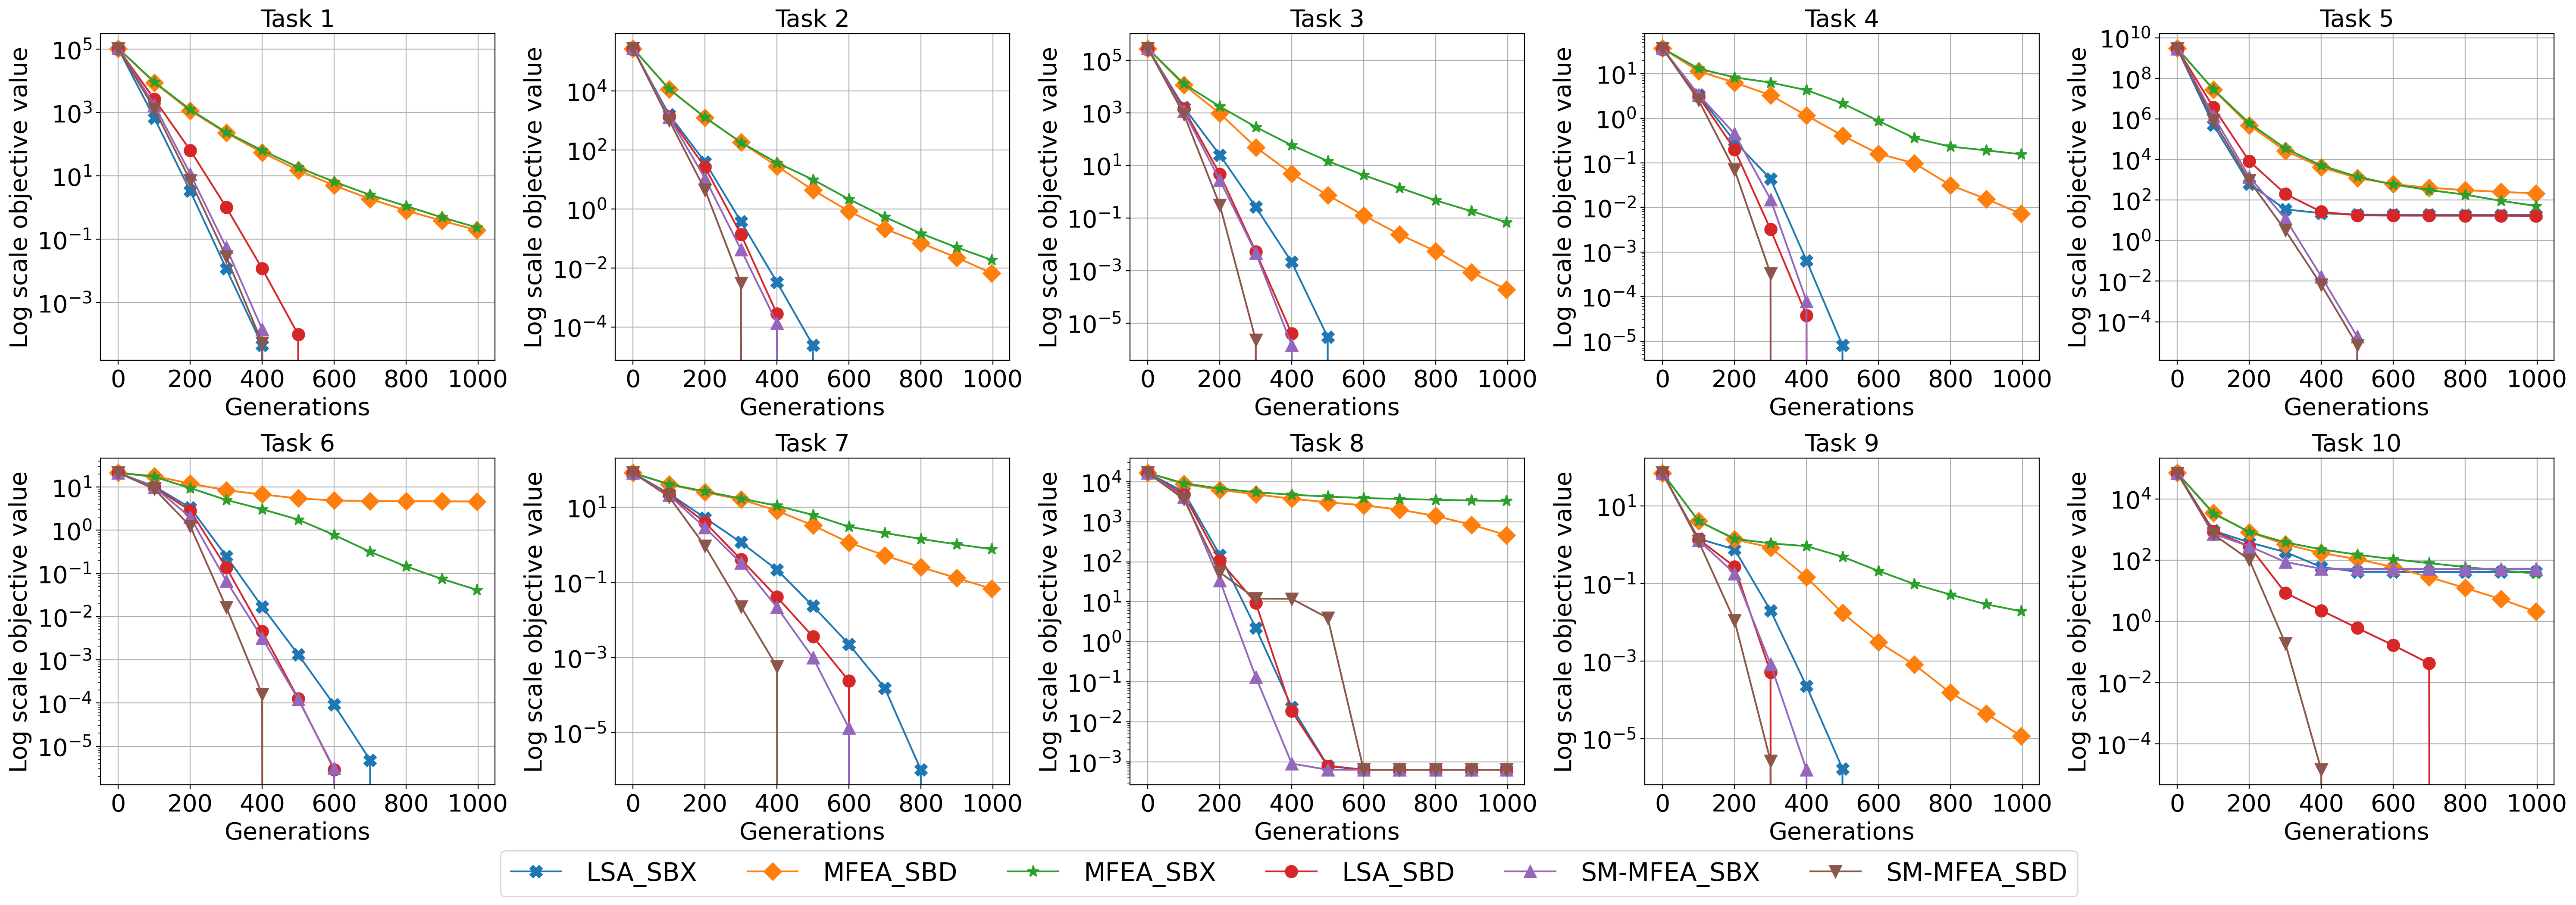

In [8]:
'''Compare between (MODEL + KL) with (MODEL + SBX)'''

compare= CompareModel(
    models = [
        # loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/LSA_KL_1s.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]), 
        
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/SBX/LSA_SBX_CEC17_JAVA_1.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_MFEA/KL/MFEA_1.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_MFEA/SBX/MFEA_cec17_1.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_LSA/KL/LSA_KL_CEC17_PYTHON_1.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA/SBX/S-MFEA_CEC17_PYTHON.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA/KL/S-MFEA_KL_CEC17_PYTHON.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),


    ],
    label= ["LSA_SBX", "MFEA_SBD", "MFEA_SBX", "LSA_SBD", "SM-MFEA_SBX", "SM-MFEA_SBD"] 
)
compare.render(
    shape=(2,5), 
    min_cost= 1e-6, 
    step=100, 
    yscale='log',
    title="",
    grid= True,
    showname= False,
    title_size= 20,
    label_size_x= 20,
    label_size_y= 20,
    x_tick_size= 20,
    y_tick_size= 20,
    handletextpad= 1,
    # borderaxespad=0.8,
    bbox_to_anchor=(0.5,-0.06),
    legend_size= 21,
    scatter_size=10,
)

##### Plot SMP

10


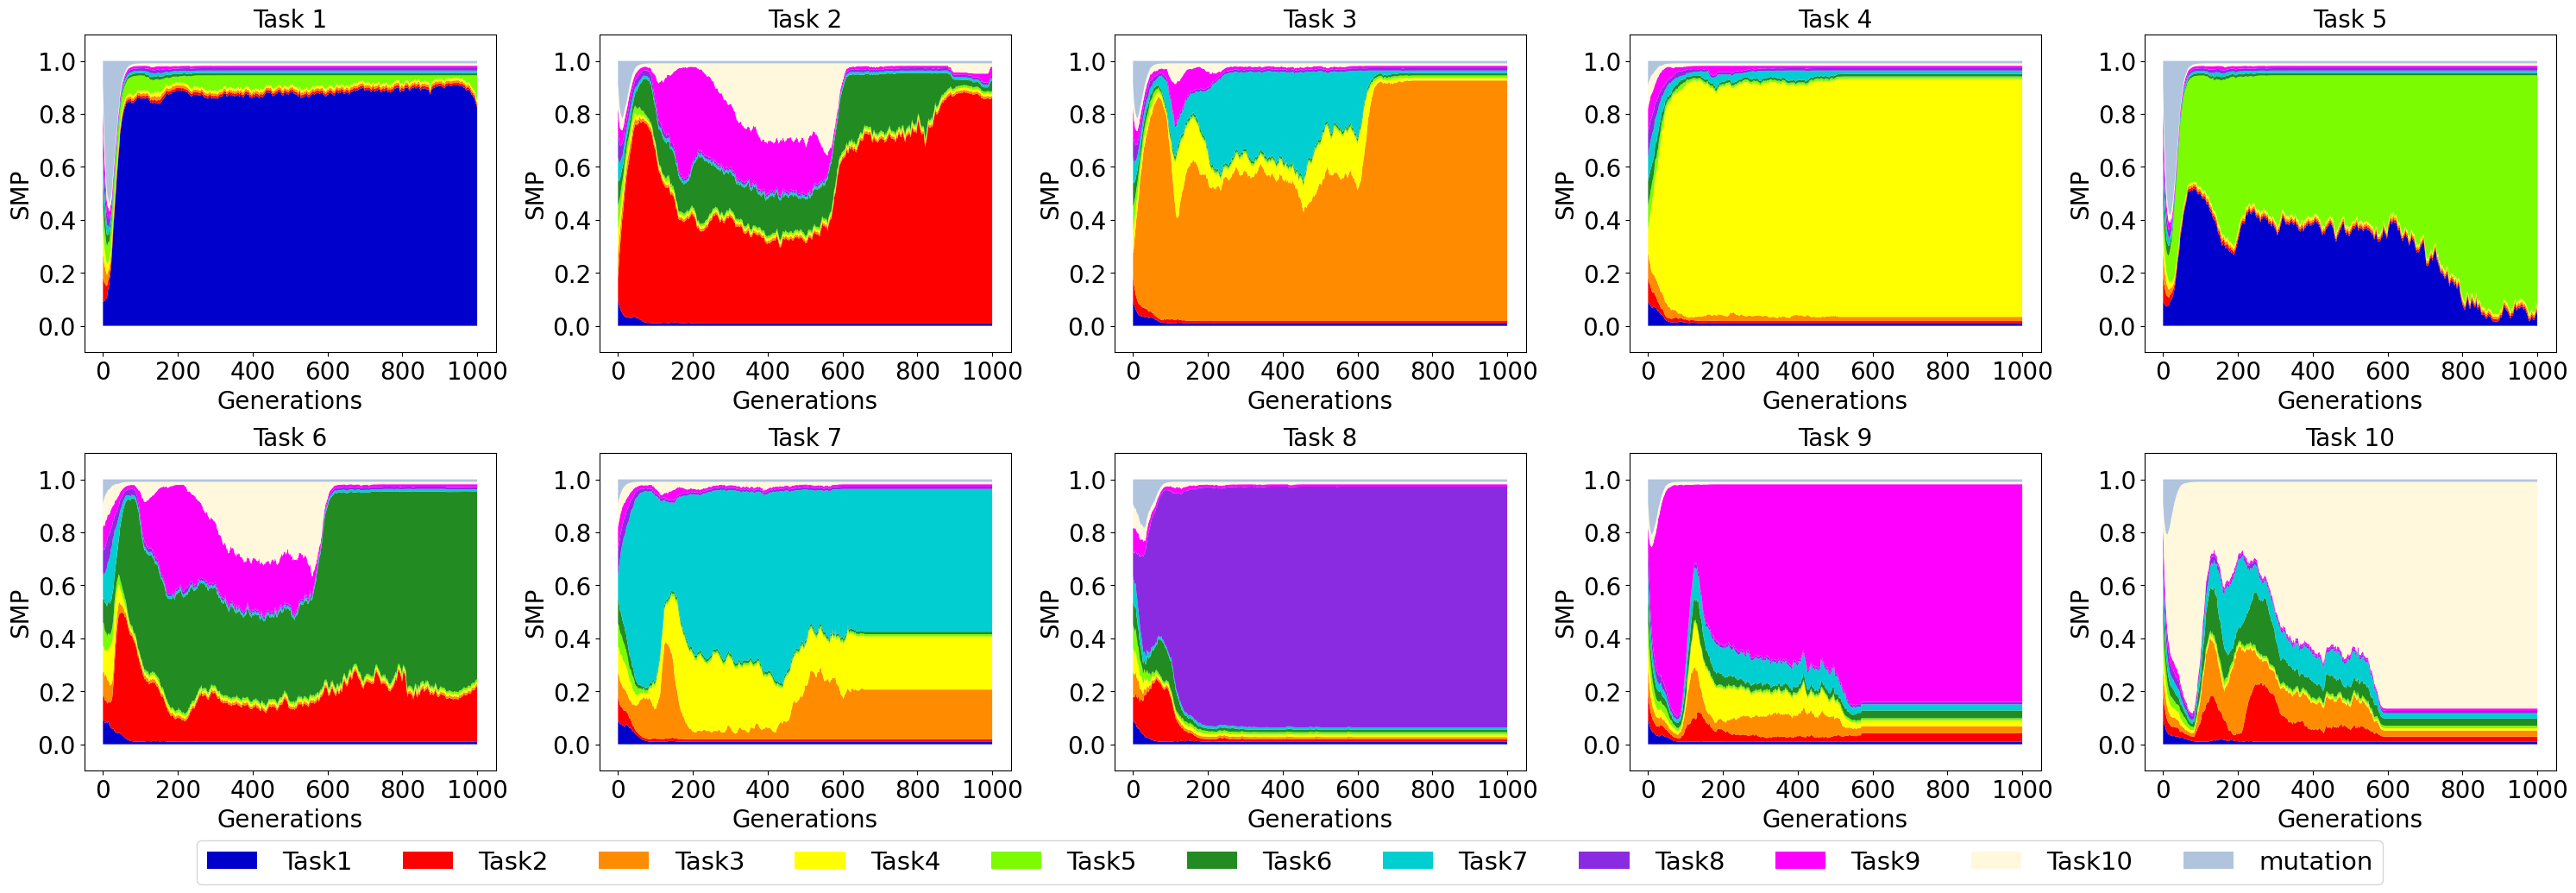

In [4]:
from MFEA_lib.model import SMP_MFEA, MFEA_base, SA_MFEA, AbstractModel
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *
from MFEA_lib.tasks.Benchmark.Competitions import CEC17_benchmark, GECCO20_benchmark_50tasks, WCCI22_benchmark

import os 
import sys 
import numpy as np 
import pandas as pd
import scipy 

import matplotlib.pyplot as plt 
# model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/S-MFEA_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/S-MFEA_KL_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])
# model.render_smp(shape= (4,3), title = "", grid= False)
model.render_smp(shape=(2,5), title= "", grid= False, label_loc= "lower center",
    title_size= 20,
    label_size_x= 20,
    label_size_y= 20,
    x_tick_size= 20,
    y_tick_size= 20,
    handletextpad= 1,
    # borderaxespad=0.8,
    bbox_to_anchor=(0.5,-0.06),
    legend_size= 21,
    ncol = 11, 
)

10


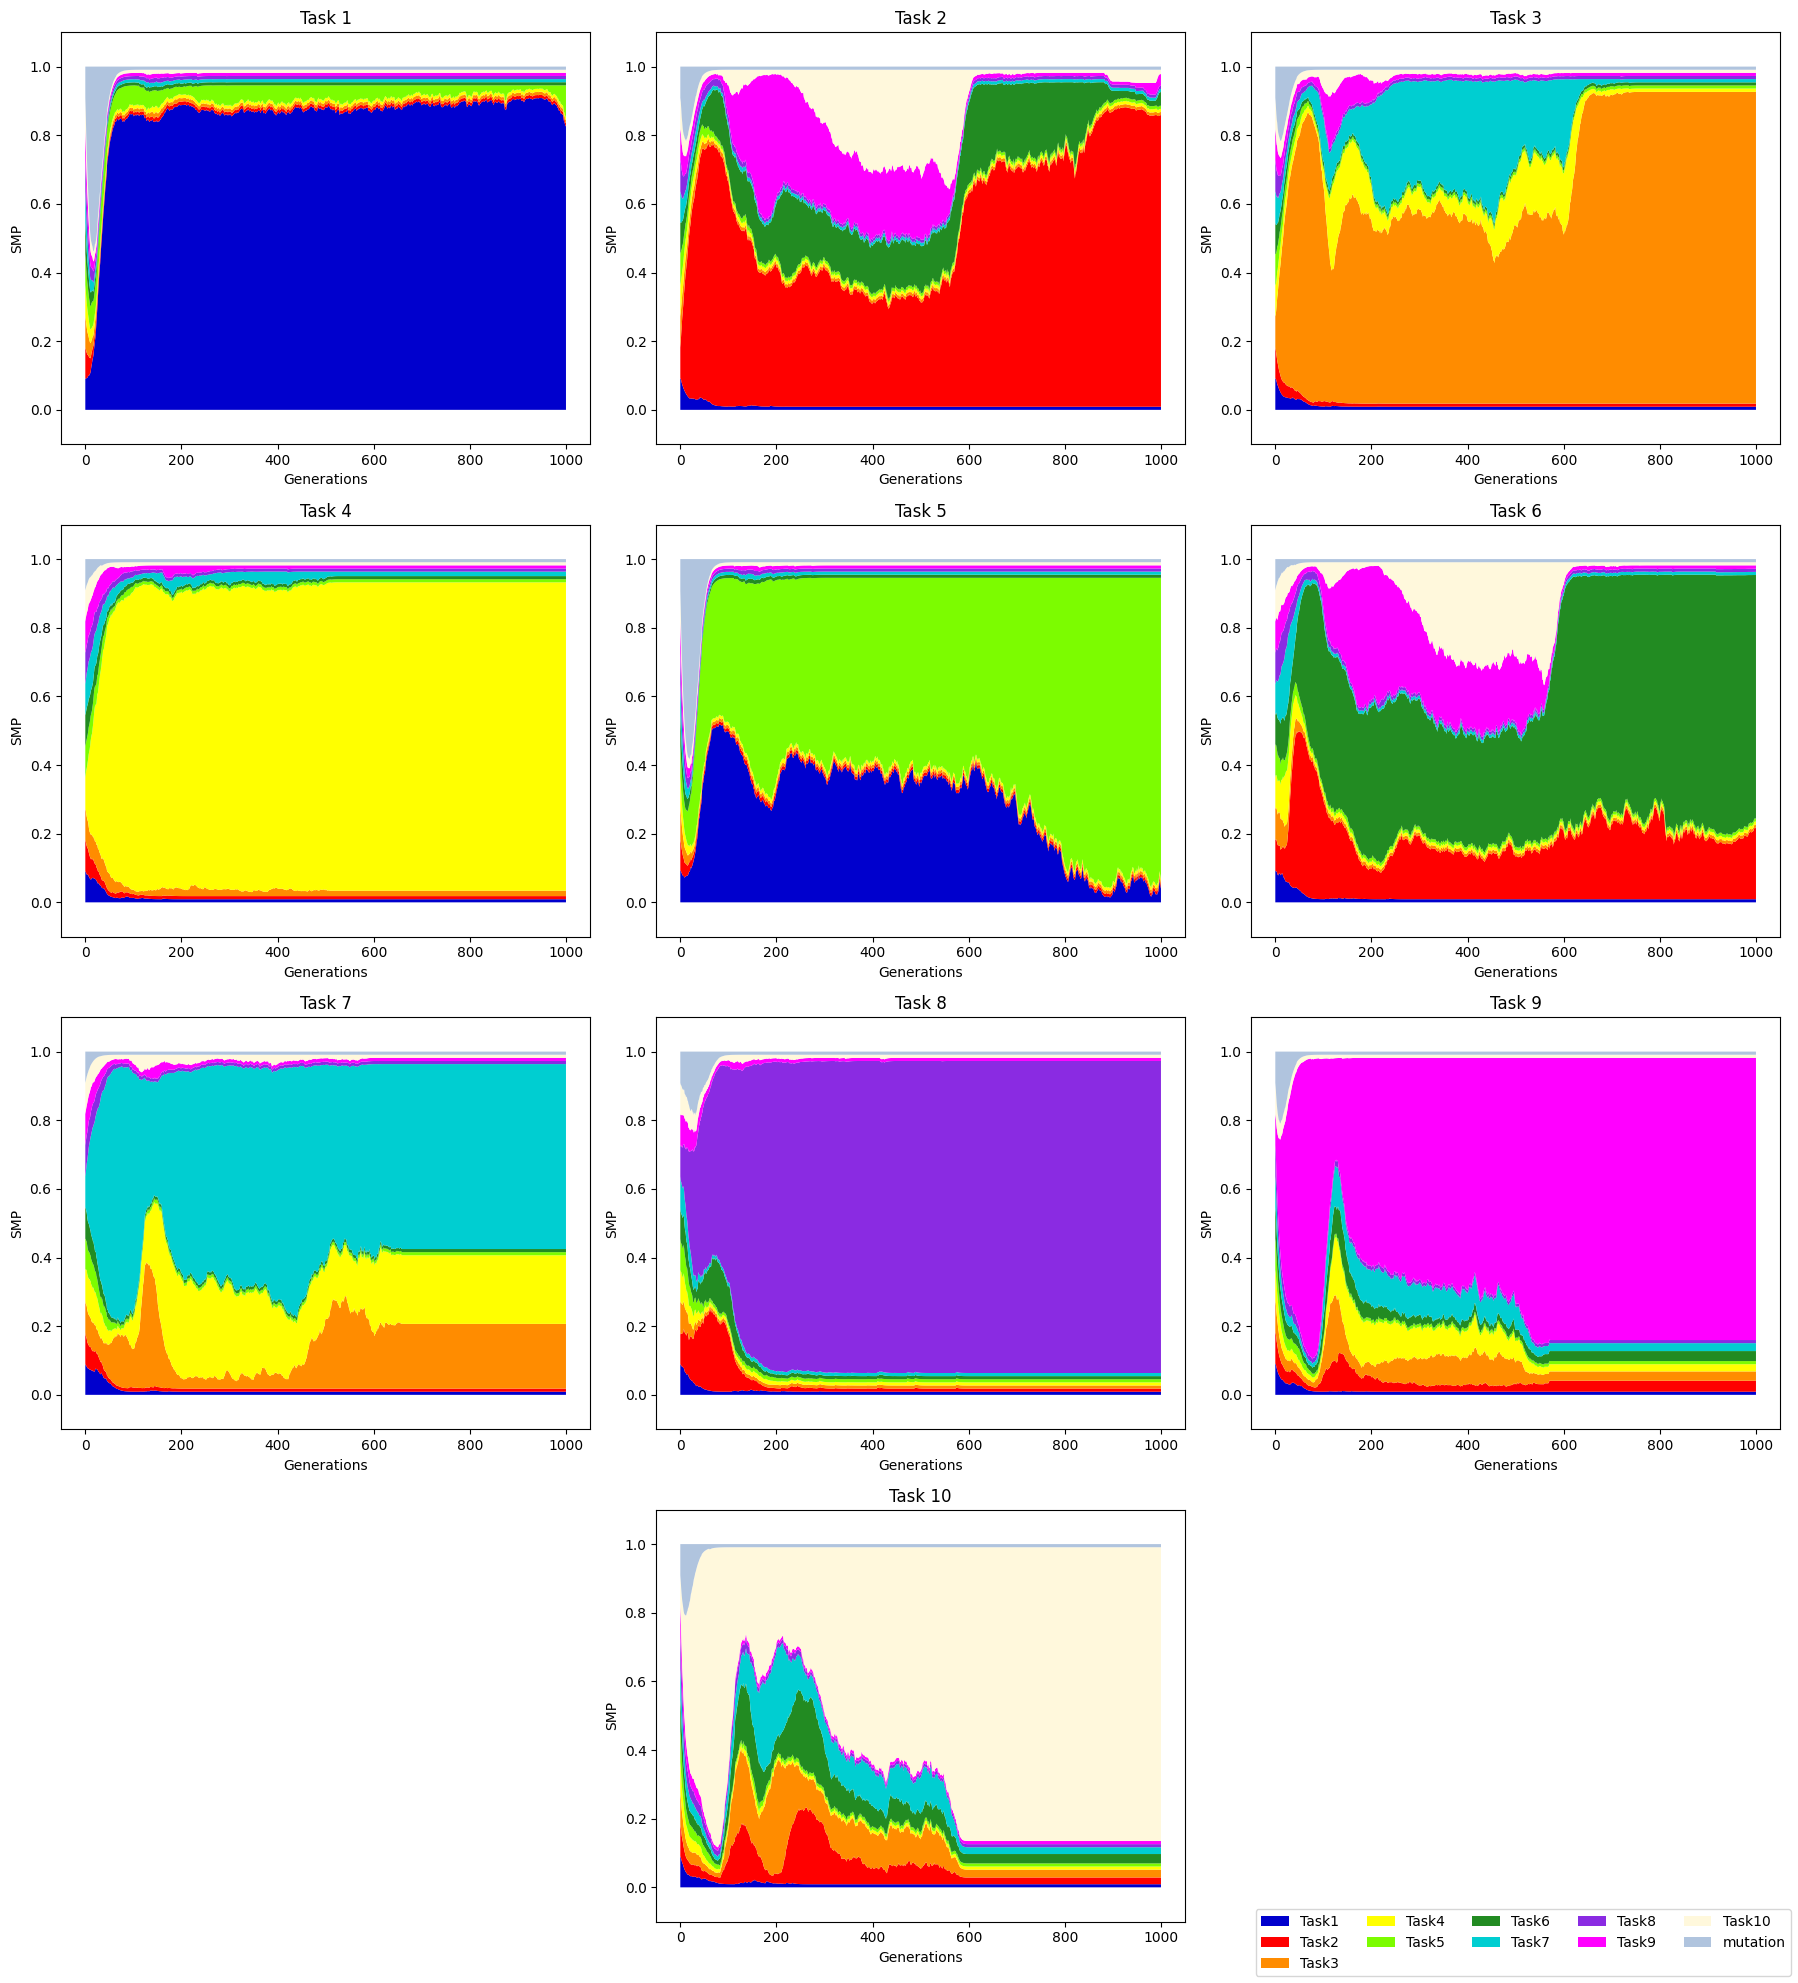

In [5]:
model.render_smp(shape=(4,3), title= "", grid= False, label_loc= "lower right")

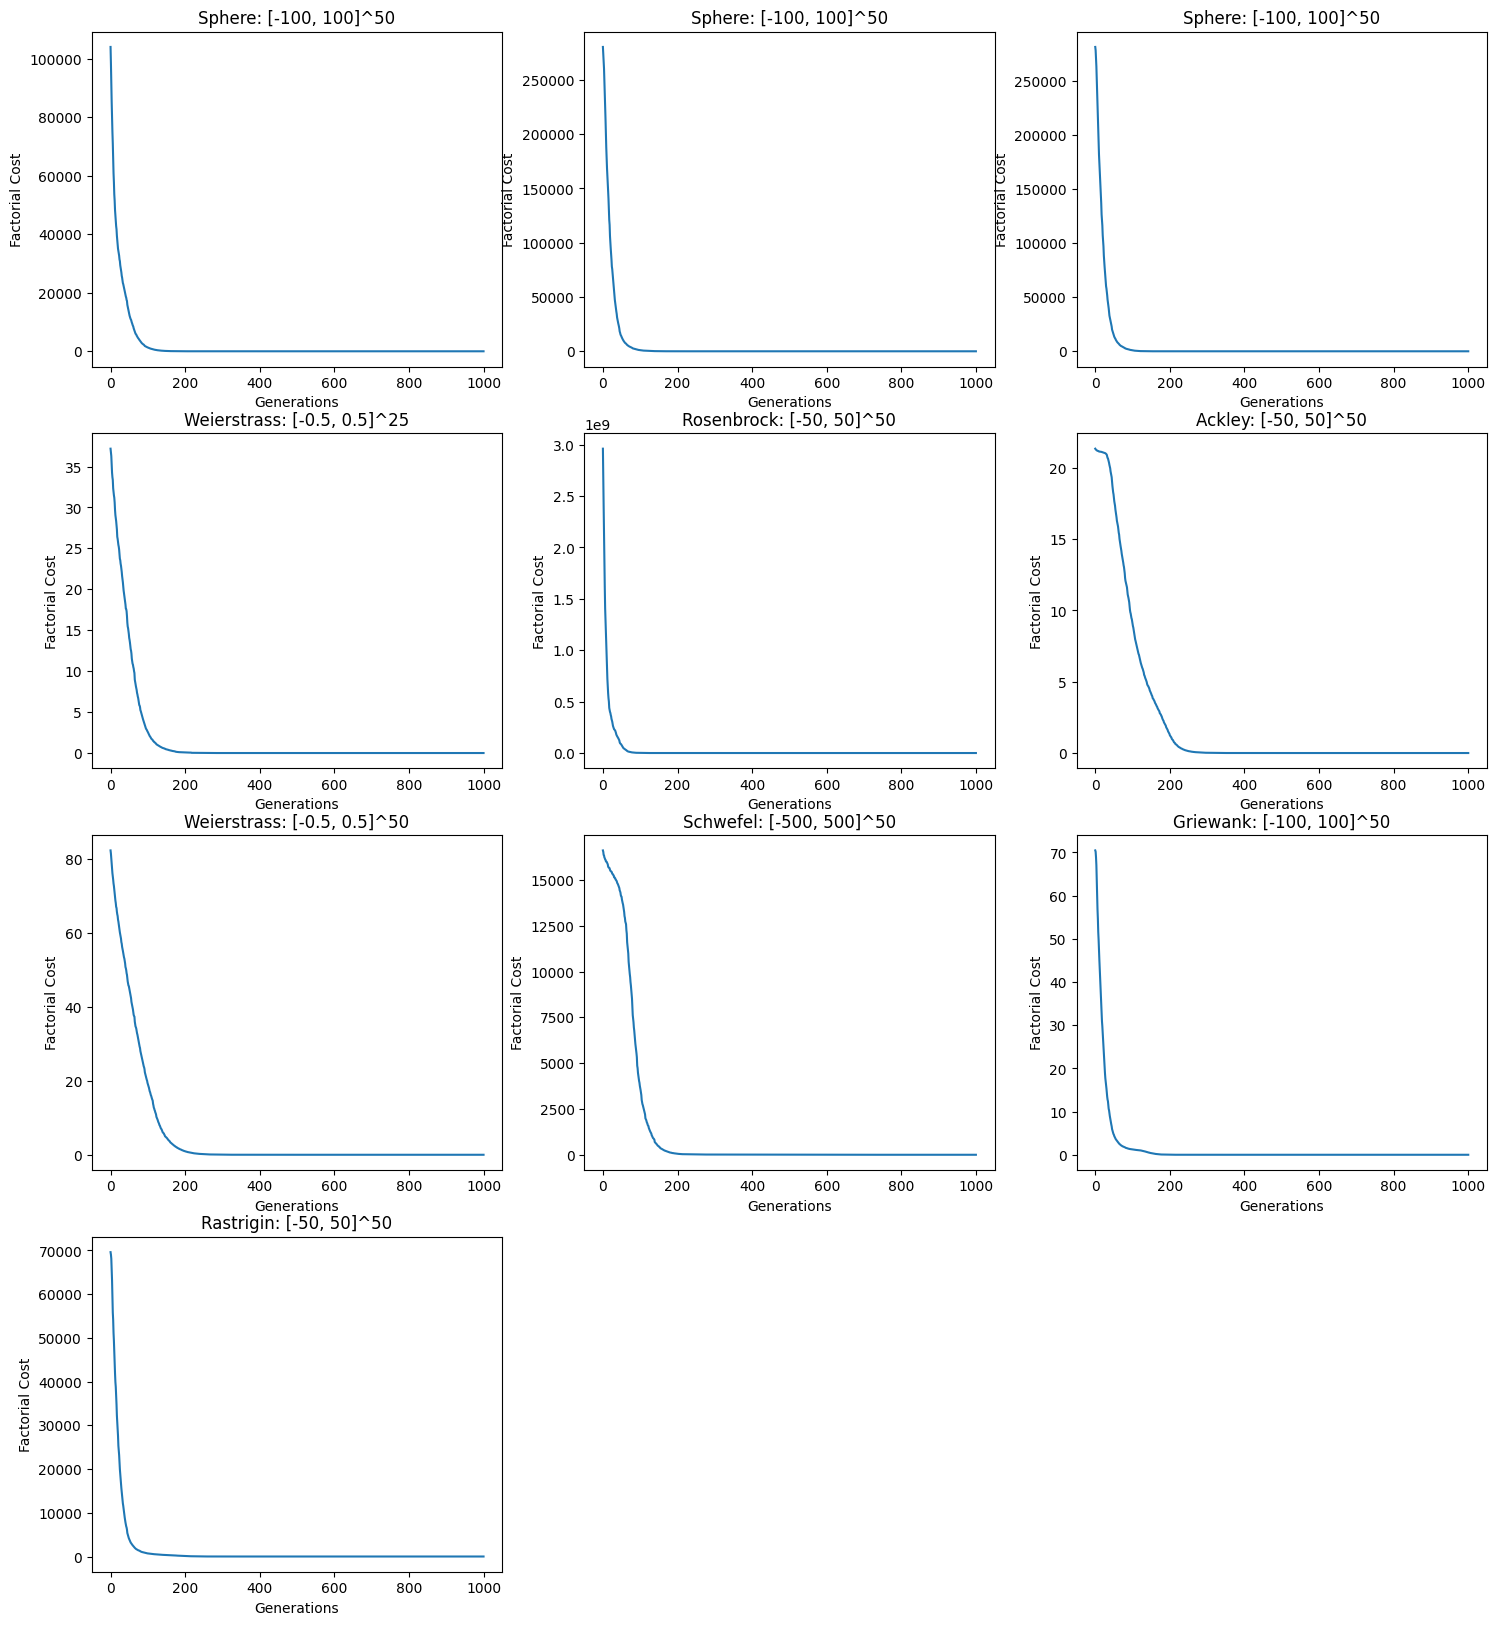

In [4]:
model.render_history()

10


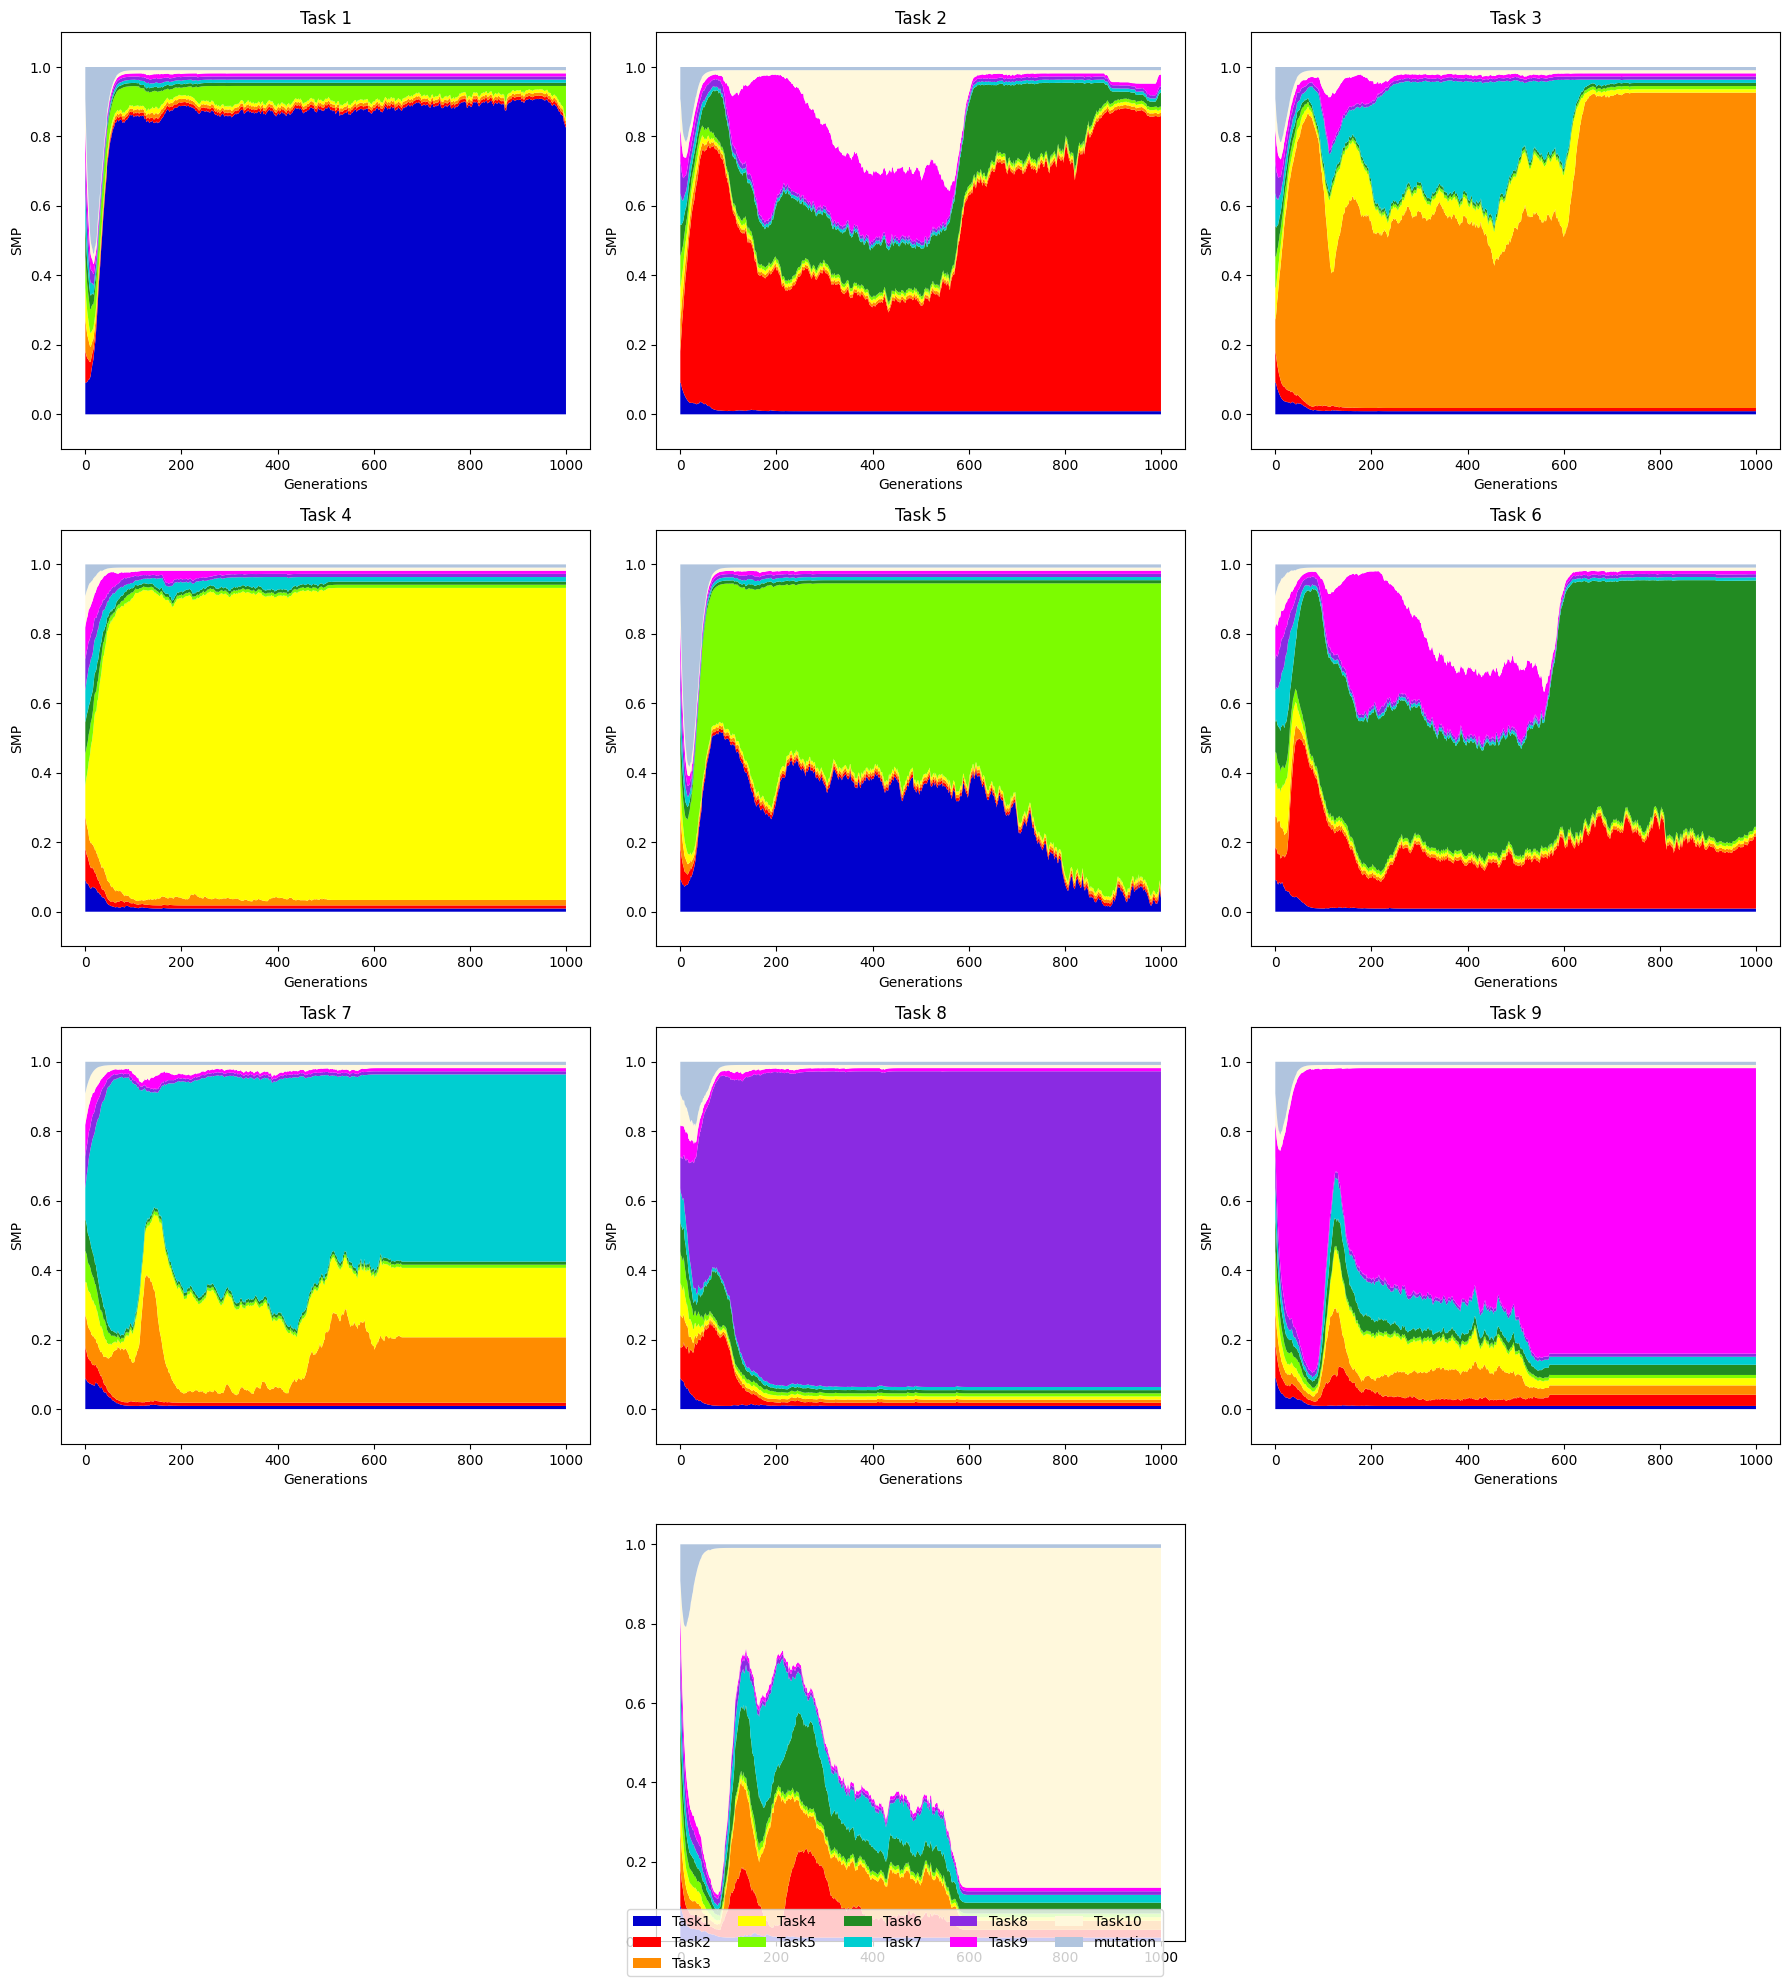

In [3]:
import matplotlib.pyplot as plt 
model = loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/S-MFEA_KL_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])
model.render_smp(shape= (4,3), title = "", grid= False)

In [10]:
model.history_smp.shape

(1001, 10, 11)

10


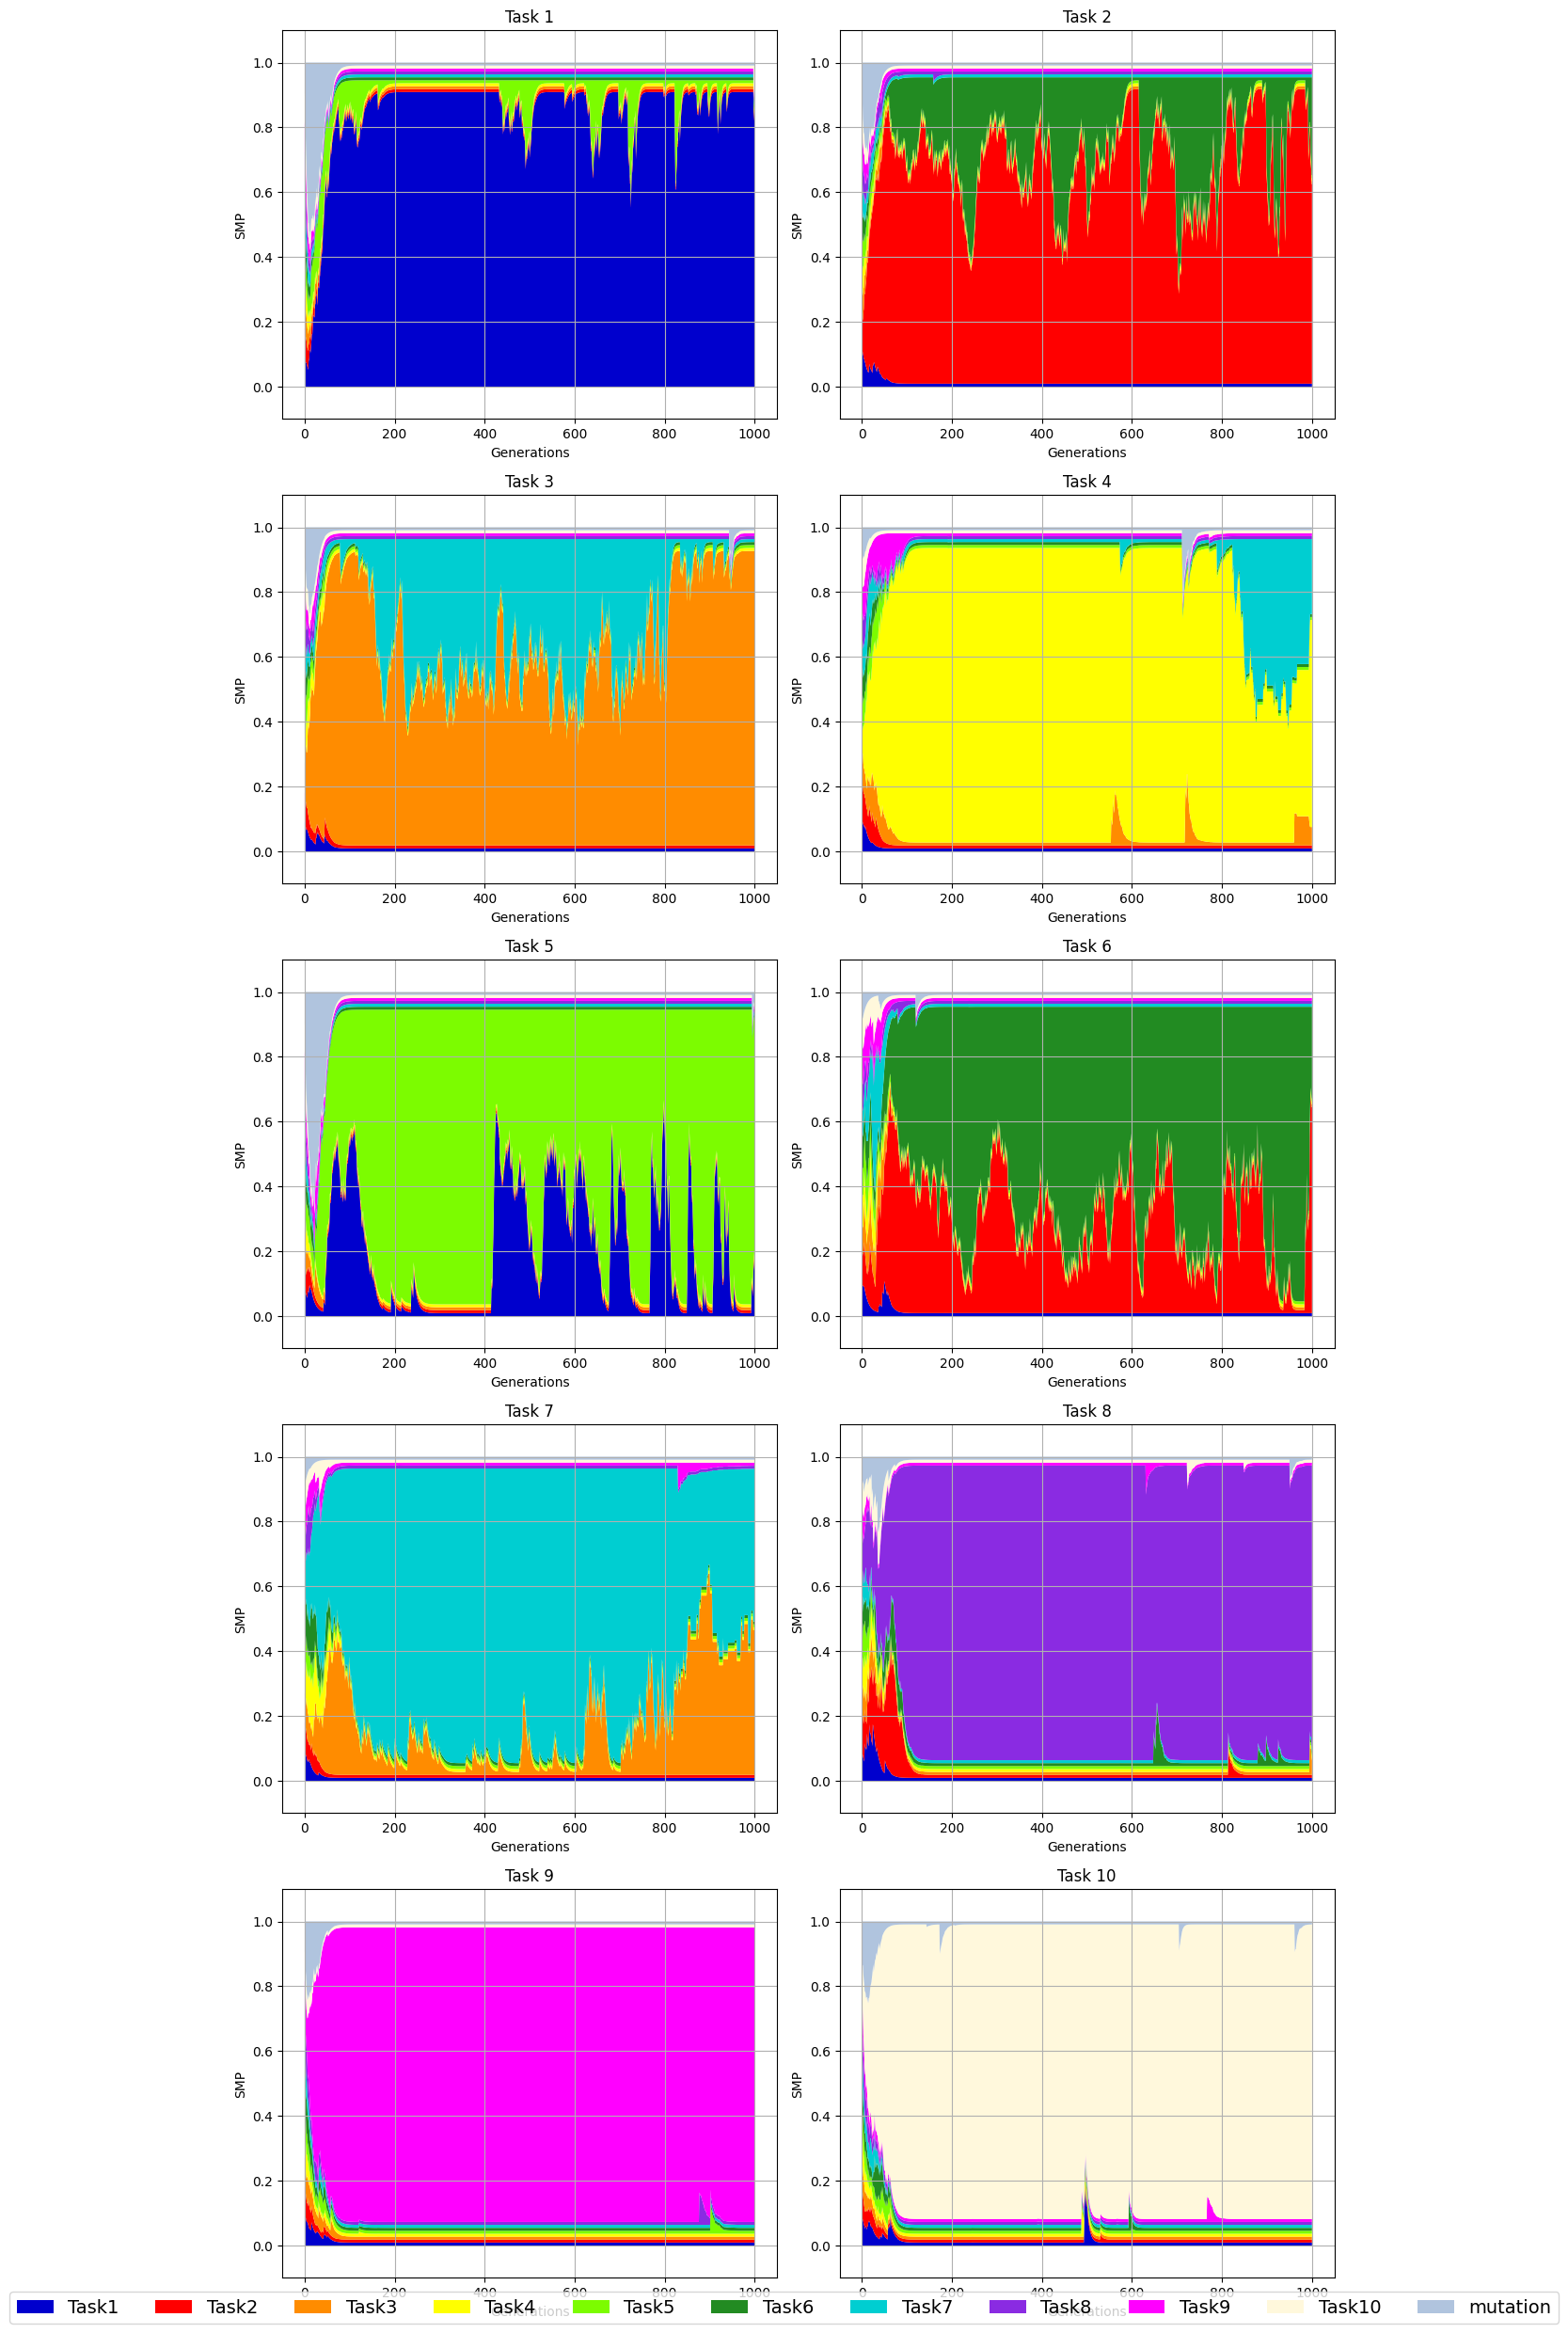

In [9]:
model.render_smp(shape= (5,2), title = "", grid= True)

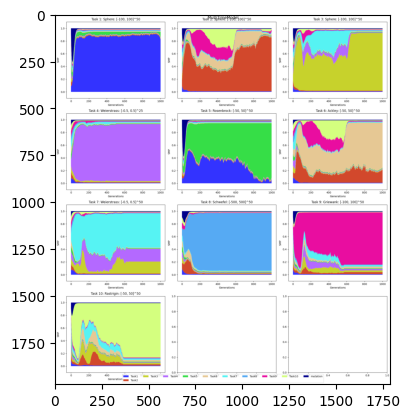

In [3]:
import cv2
import matplotlib.pyplot as plt 
image = cv2.imread("output.png")
plt.imshow(image)
plt.show()

In [9]:
plt.show()

In [29]:
file= open("tmp.txt", 'w') 
for i in model.history_cost[-1]:
    file.writelines(f"{i}\n")
file.close()

##### All

In [7]:
print(np.max(np.array([[1,2],[3,4]])))
print(max(np.max(np.array([[1,2],[3,4]])),3))

4
4


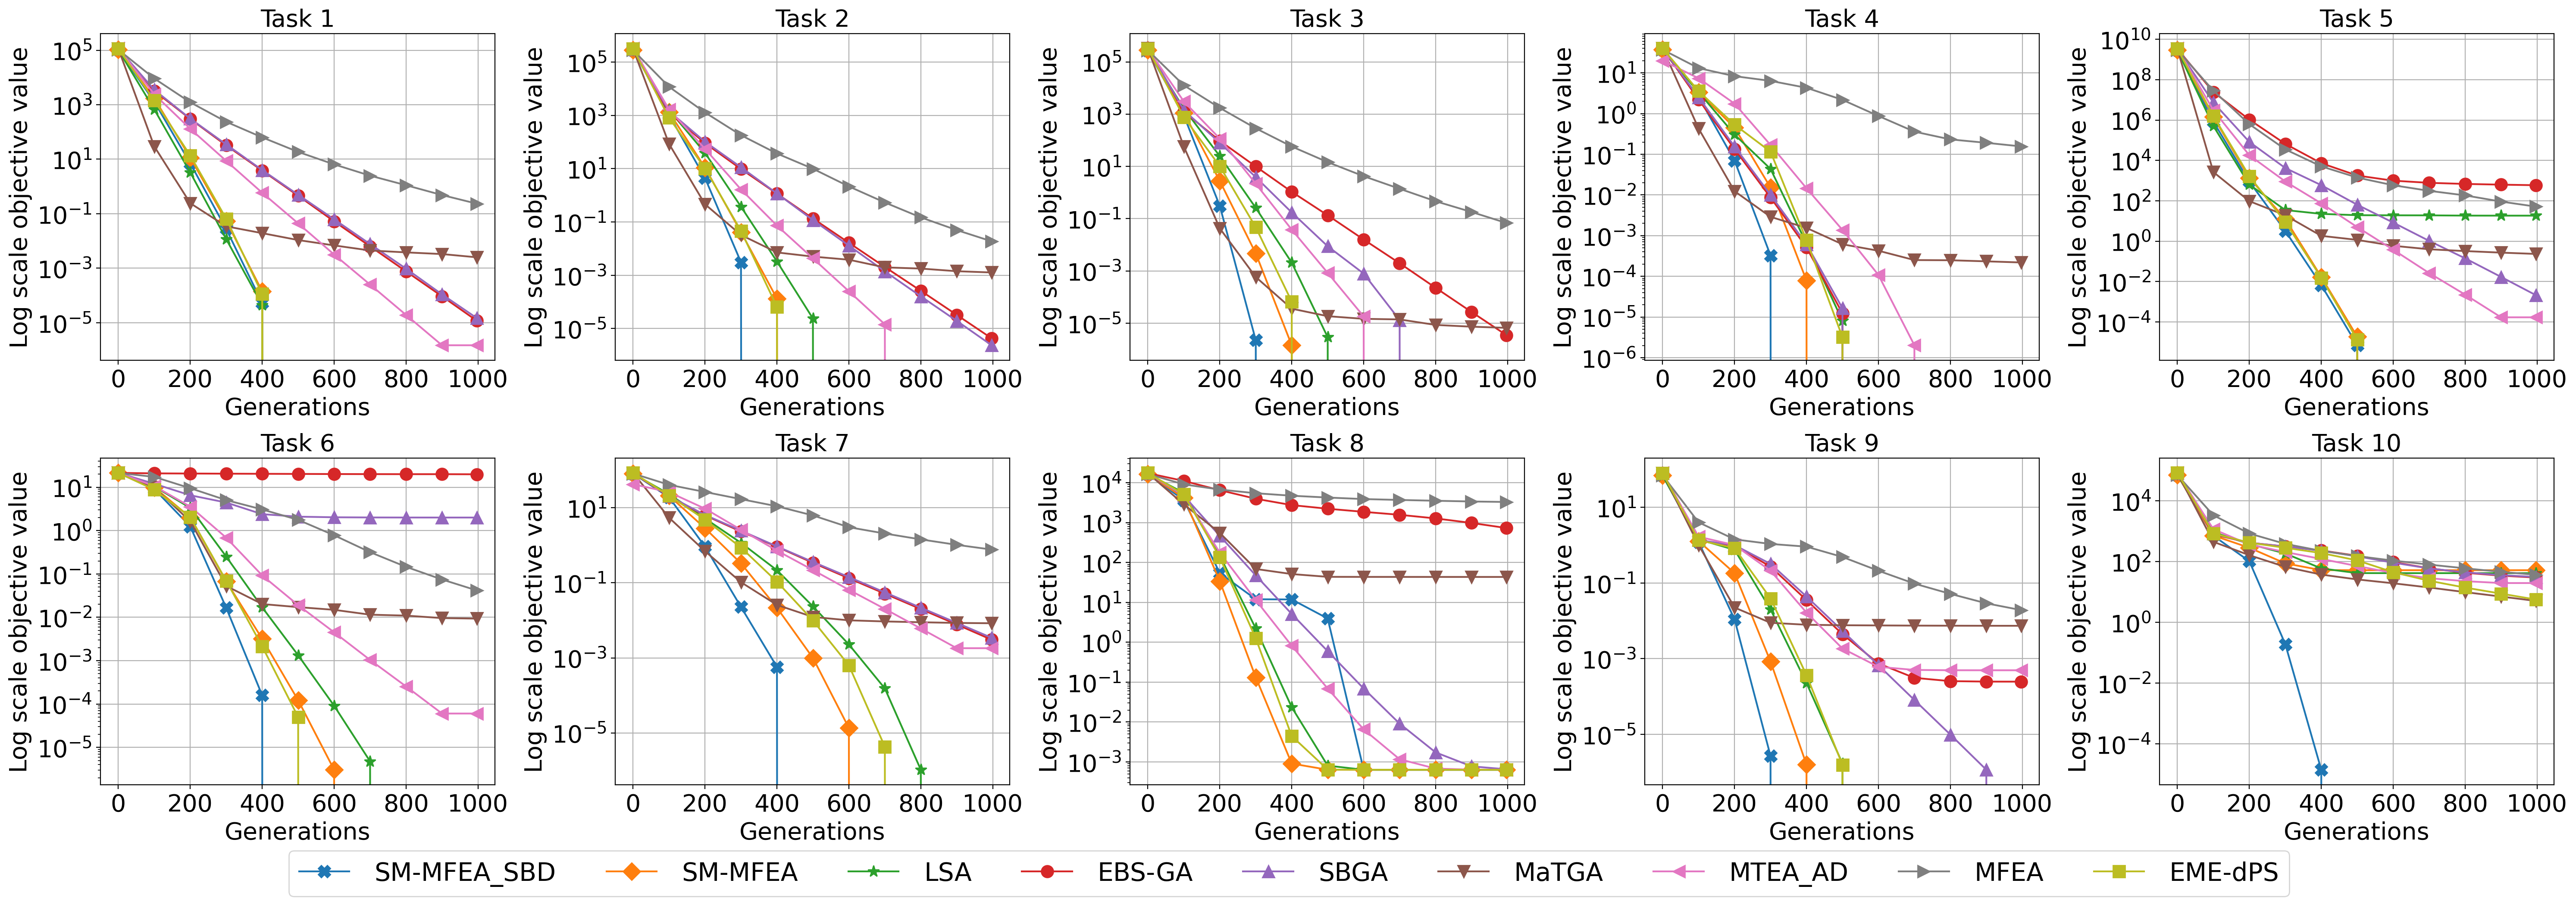

In [8]:
'''Compare between SM-MFEA with other MODEL'''

compare= CompareModel(
    models = [
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/S-MFEA_KL_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/S-MFEA_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/LSA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/EBS_GA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/SBS_GA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/MaTGA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/MTEA_AD_CEC17_matlab.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/MFEA_cec17.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/Ensemble.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

    ],
    label= ["SM-MFEA_SBD", 'SM-MFEA', 'LSA', 'EBS-GA', 'SBGA', 'MaTGA', 'MTEA_AD', 'MFEA', "EME-dPS"] 
)
compare.render(
    shape=(2,5), 
    min_cost= 1e-6, 
    step=100, 
    yscale='log',
    title="",
    grid= True,
    showname= False,
    title_size= 20,
    label_size_x= 20,
    label_size_y= 20,
    x_tick_size= 20,
    y_tick_size= 20,
    handletextpad= 1,
    # borderaxespad=0.8,
    bbox_to_anchor=(0.5,-0.06),
    legend_size= 21,
    scatter_size= 10
)

In [3]:
model= loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/MaTGA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

In [4]:
model.history_cost[-1]

array([2.51469752e-03, 1.27560575e-03, 6.60147677e-06, 2.19181110e-04,
       2.32075919e-01, 9.33730742e-03, 8.37230635e-03, 4.34756910e+01,
       7.39266817e-03, 5.04987241e+00])

In [ ]:
model = loadModel("./result_convert_from_npy/CEC17_10tasks/smp_linear.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

In [ ]:
[model.ls_model[i].history_cost[-1][8] for i in range(30)]

In [ ]:
2getattr(model, 'nb_inds_min')

##### Time


In [20]:
model= loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/S-MFEA_KL_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

In [23]:
model.total_time / 30 

44.209324193000796

In [4]:
model = loadModel("RESULTS/result/CEC17/SMFEA/cec17.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])
print(model.total_time)

76.2058367729187


In [10]:
a= np.array([105.31906151771545,76.2058367729187]) 
a = a / a[0]
print(a)


[1.         0.72357117]


In [6]:
a = np.array([16.743,17.735,17.697,20.909,39.569])
a = a / a[0]
print(a)

[1.         1.05924864 1.05697904 1.2488204  2.36331601]


C:\Users\Admin\AppData\Local\Temp\ipykernel_17012\1491544886.py:9: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize= 10)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17012\1491544886.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize= 10)


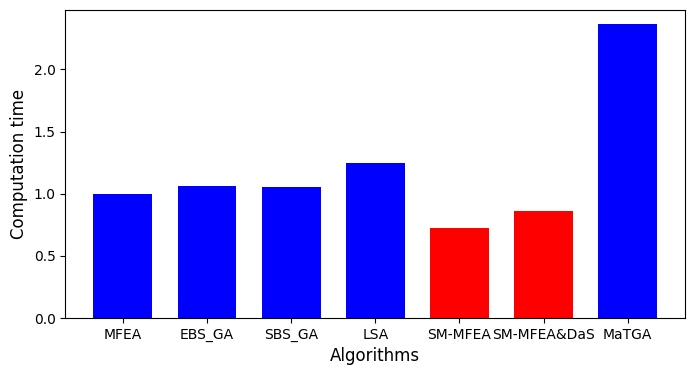

In [11]:
courses = [1,  1.05924864, 1.05697904,1.2488204, 0.72357117, 0.86043965,  2.36331601, ] 
values = ["MFEA", "EBS_GA", "SBS_GA", "LSA", "SM-MFEA", "SM-MFEA&DaS", "MaTGA", ]  
fig = plt.figure(figsize = (8, 4))
 
# creating the bar plot
plt.bar(values, courses, color=['blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue'],
        width = 0.7)
for tick in fig.axes[0].xaxis.get_major_ticks(): 
    tick.label.set_fontsize(fontsize= 10)
for tick in fig.axes[0].yaxis.get_major_ticks(): 
    tick.label.set_fontsize(fontsize= 10)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Computation time", fontsize=12)
# plt.title("Computation time")
plt.show()

In [62]:
model= loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/Compare_conver_trend/MaTGA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])
print(model.total_time / 30 )

80.75334031000001


In [13]:
model.total_time / 60 

27.350432425

In [16]:
path_dir = "RESULTS/result/GECCO20/SMFEA/"
path_dir = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/GECCO20_KL/S-MFEA"
sum = 0 
for file_name in os.listdir(path_dir): 
    model = loadModel(os.path.join(path_dir,file_name), ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0])
    sum += model.total_time
    print(model.total_time)

# model= loadModel("RESULTS/result/GECCO20/SMFEA/1.mso",ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0])
print(sum/10)

225.53710675239563
318.42889499664307
211.87805700302124
196.8814446926117
211.42788696289062
382.2741460800171
191.26091933250427
396.3140616416931
308.42549681663513
291.18468141555786
273.361269569397


In [20]:
path_dir = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/GECCO20_KL/S-MFEA-KL/"
sum = 0 
for file_name in os.listdir(path_dir): 
    model = loadModel(os.path.join(path_dir,file_name), ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0])
    sum += model.total_time / 30 
    # print(model.total_time)

# model= loadModel("RESULTS/result/GECCO20/SMFEA/1.mso",ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0])
print(sum/10)

360.27453812917076


In [22]:
kl = 360.27453812917076 * 273.361269569397 / 353.84769413312273 
print(kl)

278.3262594879782


In [24]:
a = np.array([273.361269569397, 323.4698221683502, 278.3262594879782])
a = a / a[-2]

In [14]:
a = loadModel("RESULTS/result/CEC17/MFEA/cec17.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])
b = loadModel("RESULTS/result/CEC17/SMFEA-DaS/cec17.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

In [15]:
b.total_time / a.total_time

0.8886999024750208

In [25]:
print(a)

[0.84509049 1.         0.86043965]


In [12]:
print(sum/10)

273.361269569397


In [8]:
model= loadModel("C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/GECCO20_KL/S-MFEA/1.mso",ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0])
print(model.total_time / 30 )

238.18749949932098


In [38]:
model.ls_model[0].__dict__

{'history_cost': array([[1.89843919e-05, 1.91060142e-05, 1.73042677e-05, ...,
         2.03481021e-05, 1.76662499e-05, 1.73631546e-05],
        [1.89843919e-05, 1.91060142e-05, 1.73042677e-05, ...,
         2.03481021e-05, 1.76662499e-05, 1.73631546e-05],
        [1.89843919e-05, 1.91060142e-05, 1.73042677e-05, ...,
         2.03481021e-05, 1.76662499e-05, 1.73631546e-05],
        ...,
        [1.89843919e-05, 1.91060142e-05, 1.73042677e-05, ...,
         2.03481021e-05, 1.76662499e-05, 1.73631546e-05],
        [1.89843919e-05, 1.91060142e-05, 1.73042677e-05, ...,
         2.03481021e-05, 1.76662499e-05, 1.73631546e-05],
        [1.89843919e-05, 1.91060142e-05, 1.73042677e-05, ...,
         2.03481021e-05, 1.76662499e-05, 1.73631546e-05]]),
 'seed': None,
 'result': None,
 'ls_attr_avg': ['history_cost'],
 'generations': 100,
 'display_time': True,
 'clear_output': True,
 'count_pre_line': 0,
 'printed_before_percent': -2,
 'percent_print': 0.5}

In [32]:
print(len(model.ls_model))

30


### P-value

In [19]:
a = np.array([1,2,3,4])
print(np.maximum(a,0))

[1 2 3 4]


In [70]:
df.head()

Algorithms  Better  Equal  Worse  p-value
0        LSA-KL vs LSA-SBX     315      4    181        0
1      MFEA-KL vs MFEA-SBX     388      0    112        0
2  S-MFEA-KL vs S-MFEA-SBX     285      1    214        0

In [47]:
# path = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/CEC17/COMPARE_KL_SBX_S-MFEA"
path = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/GECCO20_KL/"
# path = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/GECCO20_SBX/"
history_cost_summaries = []
for model_lib in os.listdir(path): 
    print(model_lib);
    tmp = []
    for id in os.listdir(os.path.join(path, model_lib)):
        model = loadModel(os.path.join(os.path.join(path, model_lib), id), ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(1)[0])
        # a = np.clip(model.history_cost[-1], 1e-6, 1e19) 
        a = np.where(model.history_cost[-1] < 1e-6, 0, model.history_cost[-1])
        tmp += a.tolist() 
    print(len(tmp))
    history_cost_summaries.append(tmp.copy()) 



EBS_GA
500
Ensemble
500
LSA
500
MaTGA
500
MFEA
500
MTEA_AD
500
S-MFEA
500
S-MFEA-KL
500
SBS_GA
500


In [21]:
os.listdir(path)

['EBS_GA',
 'Ensemble',
 'LSA',
 'MaTGA',
 'MFEA',
 'MTEA_AD',
 'S-MFEA',
 'S-MFEA-KL',
 'SBS_GA']

In [23]:
path = "C:/Users/Admin/Downloads/CEC17_10tasks/CEC17_10tasks/SMP_KL" 
path = "C:/Users/Admin/Downloads/RESULT/Covert_ONLY_HISTORY/GECCO/GECCO20_KL/"

In [10]:

history_cost_summaries = [] 
for lr_dir in os.listdir(path):
    tmp = []
    for model in os.listdir(os.path.join(path, lr_dir)):
        model = loadModel(os.path.join(os.path.join(path, lr_dir), model), ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])
        tmp += model.history_cost[-1].tolist() 
    print(len(tmp))
    history_cost_summaries.append(tmp.copy()
    )

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


In [43]:
ls_col_name = os.listdir(path)

In [44]:
print(ls_col_name)

['EBS_GA', 'Ensemble', 'LSA', 'MaTGA', 'MFEA', 'MTEA_AD', 'S-MFEA', 'S-MFEA-KL', 'SBS_GA']


In [48]:
history_cost_summaries = np.array(history_cost_summaries)

In [49]:
print(history_cost_summaries.T.shape)

(500, 9)


In [45]:
df = pd.DataFrame(history_cost_summaries.T,columns= ls_col_name)

In [46]:
pd.DataFrame.to_csv(df, "history_cost_summaries.csv")

### Run


In [2]:
from MFEA_lib.model import SMP_MFEA, MFEA_base, SA_MFEA, AbstractModel
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *
from MFEA_lib.tasks.Benchmark.Competitions import CEC17_benchmark, GECCO20_benchmark_50tasks, WCCI22_benchmark

import os 
import sys 
import numpy as np 
import pandas as pd
import scipy 

import matplotlib.pyplot as plt 


# # gecco20
# ls_benchmark = []
# ls_IndClass = []
# name_benchmark = []
path = './RESULTS/result/CEC17/MFEA/'

# for i in range(1, 11, 1):
#     t, ic = WCCI22_benchmark.get_50tasks_benchmark(i)
#     ls_benchmark.append(t)
#     ls_IndClass.append(ic)
#     name_benchmark.append(i)

# cec17
t, ic = CEC17_benchmark.get_10tasks_benchmark()

ls_benchmark = [t]
ls_IndClass = [ic]
name_benchmark = ["cec17"]

mfeawModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= MFEA_base
)
mfeawModel.compile( 
    crossover= SBX_Crossover(nc = 2),
    mutation= PolynomialMutation(nm = 5),
    selection= ElitismSelection(),
    attr_tasks = ['crossover', 'mutation'],
)
mfeawModel.fit(
    nb_generations = 1000, rmp = 0.3, nb_inds_each_task= 100, 
    bound_pop= [0, 1], evaluate_initial_skillFactor= True
)
a = mfeawModel.run(
    nb_run= 2,     
    save_path= path
)

Seed: 0 -- Time: 00m 56.48s  100 % [====================>]  Cost: 8.80E-02  1.62E-02  3.24E-02  1.09E-01  1.23E+01  4.44E-02  7.20E-01  3.26E+03  1.50E-02  3.64E+01  ,  
END!
Seed: 1 -- Time: 00m 56.95s  100 % [====================>]  Cost: 5.39E-01  2.01E-02  6.76E-02  1.13E-01  2.68E+02  4.54E-02  7.81E-01  3.06E+03  2.22E-02  4.18E+01  ,  
END!
DONE!
Saved
